# Lead Scoring Case Study

### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. When these people fill up a form providing their email address or phone number, they are classified to be a lead. The company wishes to identify the most potential leads, also known as ‘Hot Leads’. A leads dataset from the past with around 9000 data points is provided. This dataset consists of various attributes. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

### Goals of the Case Study

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted
- Answer problems presented by Company and give recommendations in PPT.

## This notebook is divided into four sections

### 1. Data Inspection

### 2. Data Preparation

### 3. EDA

### 4. Model Selection and Analysis

In [211]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_colwidth', 200)


# Section 1 - Data Inspection

In [212]:
# Reading csv file
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [213]:
leads.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.00,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.00,17.00,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.00,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,19.00,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.00,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.00,20.00,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.00,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.00,16.00,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.00,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.00,18.00,No,Yes,Modified


In [214]:
#Checking Shape
leads.shape

(9240, 37)

In [215]:
#Checking datatypes, null count
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [216]:
#Checking Statistical description
leads.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.00,617188.44,23406.00,579533.00,596484.50,615479.00,637387.25,660737.00
Converted,9240.00,0.39,0.49,0.00,0.00,0.00,1.00,1.00
TotalVisits,9103.00,3.45,4.85,0.00,1.00,3.00,5.00,251.00
Total Time Spent on Website,9240.00,487.70,548.02,0.00,12.00,248.00,936.00,2272.00
Page Views Per Visit,9103.00,2.36,2.16,0.00,1.00,2.00,3.00,55.00
Asymmetrique Activity Score,5022.00,14.31,1.39,7.00,14.00,14.00,15.00,18.00
Asymmetrique Profile Score,5022.00,16.34,1.81,11.00,15.00,16.00,18.00,20.00


In [217]:
# Sorting Null Values in Descending order
leads.isnull().sum().sort_values(ascending = False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

In [218]:
# Finding % Column wise null value in Descending order
(leads.isnull().mean().sort_values(ascending = False)*100)

Lead Quality                                    51.59
Asymmetrique Profile Score                      45.65
Asymmetrique Activity Score                     45.65
Asymmetrique Profile Index                      45.65
Asymmetrique Activity Index                     45.65
Tags                                            36.29
What matters most to you in choosing a course   29.32
Lead Profile                                    29.32
What is your current occupation                 29.11
Country                                         26.63
How did you hear about X Education              23.89
Specialization                                  15.56
City                                            15.37
TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                 

In [219]:
# Checking No. of Rows retained after removing all rows with Null Values
drop_app1 = leads.dropna(axis = 0)
drop_app1.shape

(1943, 37)

#### **`We see if all null values are removed only few rows will be left for analysis`**

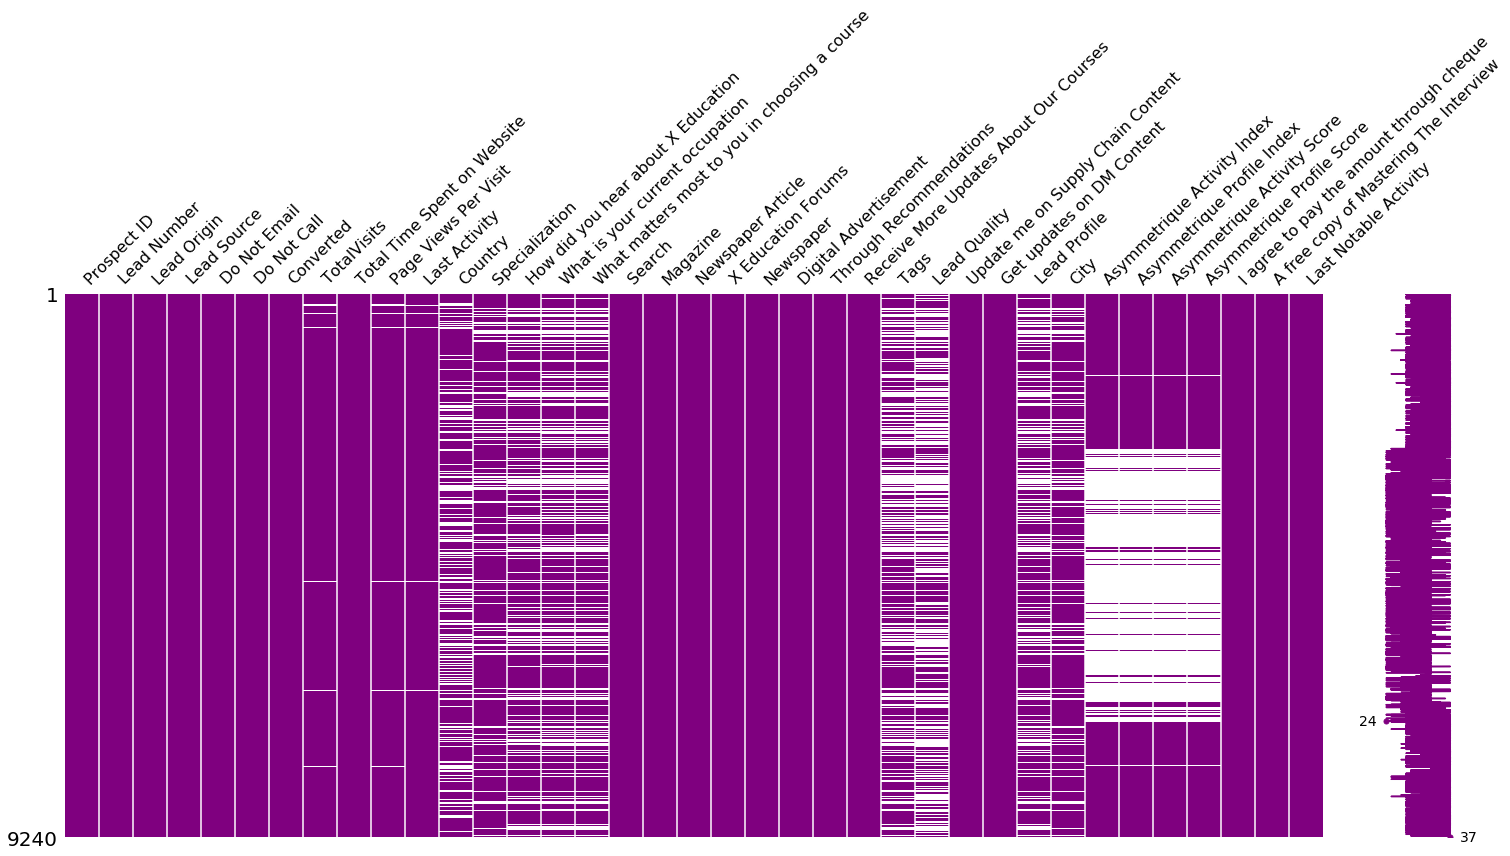

In [220]:
#Viewing Missing Values in Dataframe
# Missing values are seen in white color in each column
missingno.matrix(leads,color = (0.5, 0.0, 0.5))

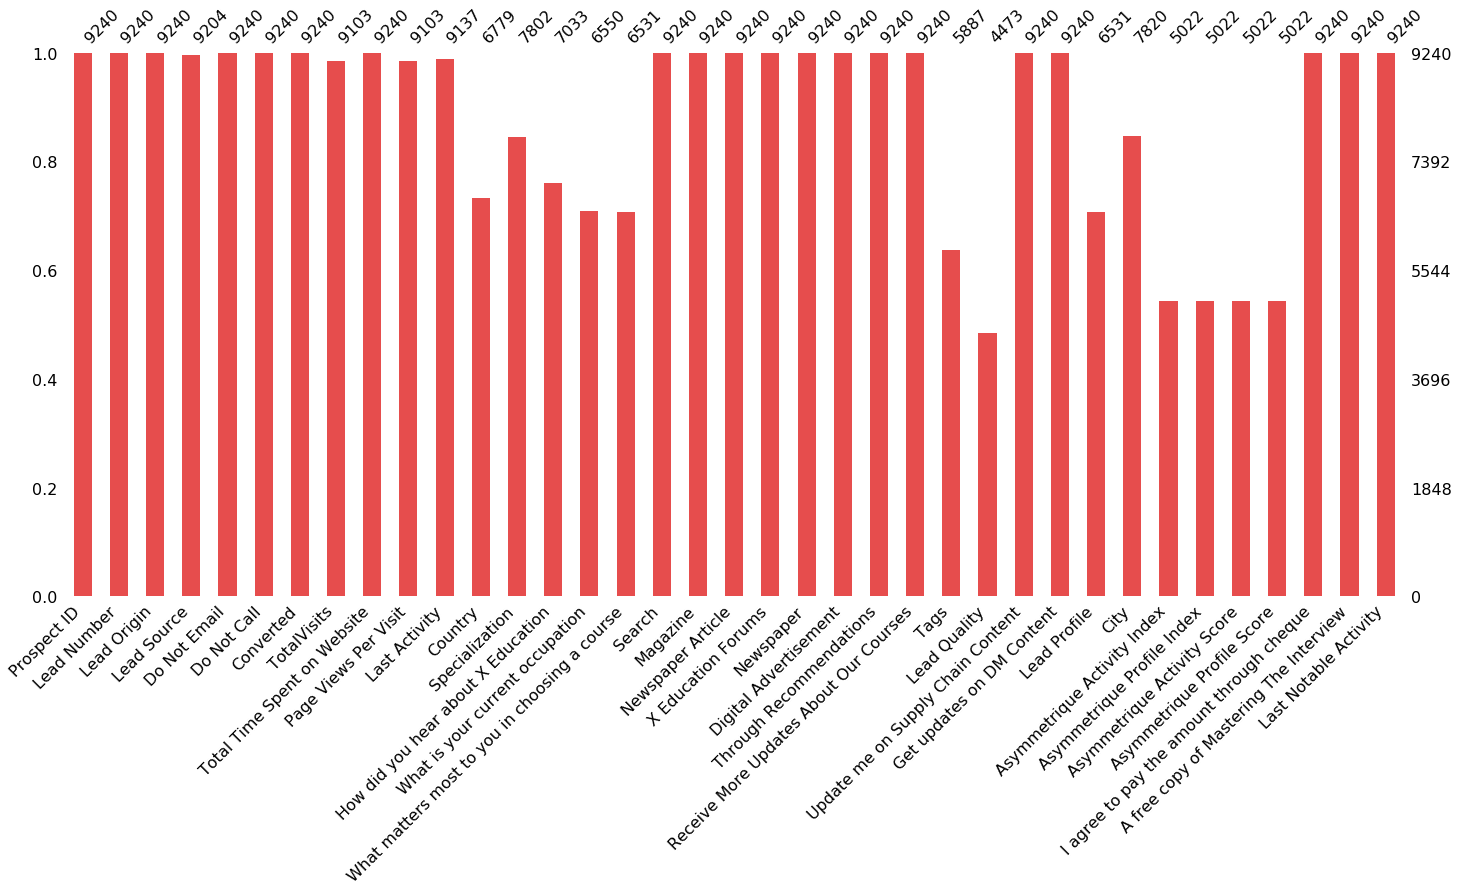

In [221]:
#Missing values in Barplot
missingno.bar(leads, color = (0.9, 0.3, 0.3))

### Analysing value_counts and Null Values

In [222]:
# Checking and Analysing value_counts and Null Values of each column
col = leads.columns.to_list()                            # Columns of DataFrame 
for j, i in enumerate(col):
    print('Column ', j, ' ',i )
    print(leads[i].value_counts())
    print()
    print('Column ', j, "Null Values Percentage")
    print(leads[i].isnull().value_counts()*100/9240)
    print('                                     ')
    print('*************************************')
    print('                                     ')

Column  0   Prospect ID
8b2ef610-9d89-4d71-9d7e-cc3ca89cbf5e    1
dd5ed9c0-298b-416e-b7e3-ee4da8511b8f    1
bb8e9fc5-3f58-4fef-8483-10ad1d489490    1
823dd4ce-2b24-4547-ac4b-9c5e4025f6e0    1
187e4188-6ece-4a51-9aca-5978e33ec46f    1
c431e421-4acf-4de8-a7b2-7ed19527d2e4    1
afc71cc4-67a4-42ae-89f7-779d20c5810d    1
5d421eb5-c831-45eb-8c63-c21027815c13    1
d2028e62-0189-4e3e-8653-a4822d98eb56    1
b044dcdc-2814-459f-bf73-7466082d624d    1
485f33b3-fc57-4e9a-ab44-d9058925b049    1
6be741da-525d-11e6-96be-22000aa8e760    1
f2200096-f879-49d3-afbb-8a881caba14f    1
c5a60086-dc66-481b-93d5-2ddc395509bf    1
e892b185-9963-4f0a-a3d6-3b99c975ed99    1
8e5359ca-72bf-4595-ba43-5a94cf136337    1
69b98003-8dcb-40a1-864e-bae865a53461    1
7e762c49-35fa-4525-a20a-f5bfb2a29a28    1
2d273c2c-9300-46bf-9bae-1204f69ea326    1
ed688fc7-9a8b-4ed0-bd9a-be578eee6787    1
355af65a-f503-4ac0-a528-7cafa353df88    1
e40f599f-ce88-40aa-901c-5af6be0f7ab8    1
66200d98-85df-4d0e-81be-7c8ebbbf71ce    1
f04ca24c-1

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Column  14 Null Values Percentage
False   70.89
True    29.11
Name: What is your current occupation, dtype: float64
                                     
*************************************
                                     
Column  15   What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Column  15 Null Values Percentage
False   70.68
True    29.32
Name: What matters most to you in choosing a course, dtype: float64
                                     
*************************************
                                     
Column  16   Search
No     9226
Yes      14
Name: Search, dtype: int64


### Inferences After Checking Value_Counts and Null Values

`[0 'Prospect ID',                         - Needs inspection for unique` 

 `1 'Lead Number',                         - Needs inspection for unique`
 
 `2 'Lead Origin',                         - Can be Binned`
 
 `3 'Lead Source',                         - Can be Binned`
 
 `4 'Do Not Email',                        - Biased,  can be dropped`
 
 `5 'Do Not Call',                         - Biased, can be dropped `
 
 **6 'Converted',                          - To be retained**
 
 `7 'TotalVisits',                         - Needs Outlier Treatment`
 
 `8 'Total Time Spent on Website',         - 2193 people have spent 0 min, Needs Outlier Treatment`
 
 `9 'Page Views Per Visit',                - 2189 people have 0 page views, Needs Outlier Treatment`
 
 **10 'Last Activity',                     - To be retained**
 
 `11 'Country',                            - India has 6492 people, Has 26% Missing, is Biased,  can be dropped` 
 
 `12 'Specialization',                     - Select = 1942 - This represents Missing Values + 15% Null More Analysis required`
 
 `13 'How did you hear about X Education', - Select = 5043 - This represents Missing Values + 23% Null so it can be dropped`
 
 `14 'What is your current occupation',    - Unemployed = 5600, + 29% Null, is highly Biased so it can be dropped`
 
 `15 'What matters most to you in 
     choosing a course',                  - Biased, can be dropped`
 
 `16 'Search',                             - Biased, can be dropped`
 
 `17 'Magazine',                           - Biased, can be dropped`
 
 `18 'Newspaper Article',                  - Biased, can be dropped`
 
 `19 'X Education Forums',                 - Biased, can be dropped`
 
 `20 'Newspaper',                          - Biased, can be dropped`
 
 `21 'Digital Advertisement',              - Biased, can be dropped`
 
 `22 'Through Recommendations',            - Biased, can be dropped`
 
 `23 'Receive More Updates About Our 
      Courses',                           - Biased, can be dropped`
 
 `24 'Tags',                               - 36 % Null with Redundant Information - can be dropped`
 
 `25 'Lead Quality',                       - 48 % Null To be analysed`
 
 `26 'Update me on Supply Chain Content',  - Biased, can be dropped`
 
 `27 'Get updates on DM Content',          - Biased, can be dropped`
 
 `28 'Lead Profile',                       - Select = 4146 - This represents Missing Values + 29% Null so it can be dropped`
 
 `29 'City',                               - Select = 2249 - This represents Missing Values + 15% Null More Analysis required`
 
 `30 'Asymmetrique Activity Index',        - 02.Medium has 3839 values, and 45% Null is Biased can be dropped`
 
 `31 'Asymmetrique Profile Index',         - 03.Low has 31 values, and 45% Null is Biased can be dropped`
 
 `32 'Asymmetrique Activity Score',        - 45% Null, can be dropped`
 
 `33 'Asymmetrique Profile Score',         - 45% Null, can be dropped`
 
 `34 'I agree to pay the amount through
       cheque',                           - Biased, can be dropped`
 
 **35 'A free copy of Mastering 
     The Interview',                        - To be retained**  
 
 `36 'Last Notable Activity']              - Almost Similar to 'Last Activity' Column, can be dropped`
 


### Checking Unique Value

In [223]:
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

#### **`Prospect ID and Lead Number have unique values so "Prospect ID" column can be dropped`**

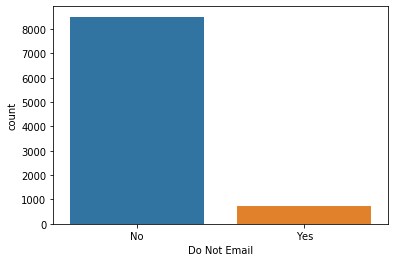

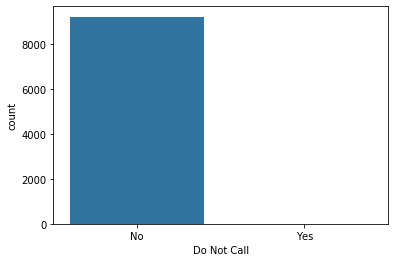

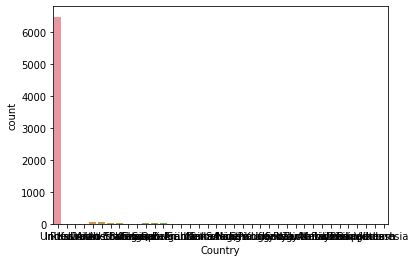

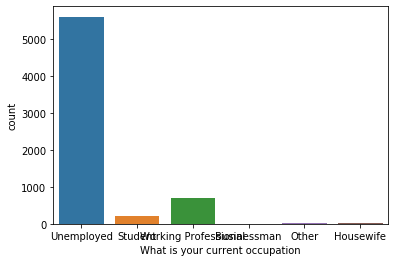

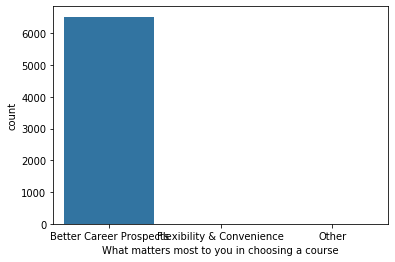

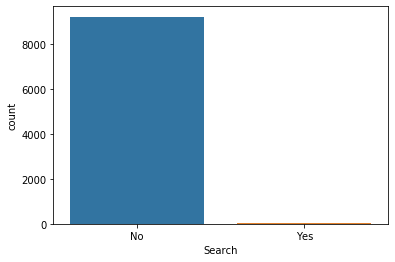

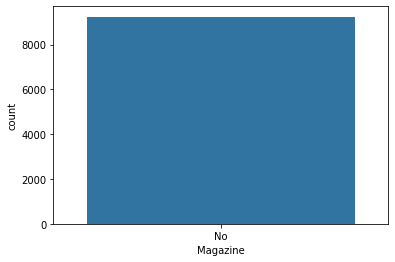

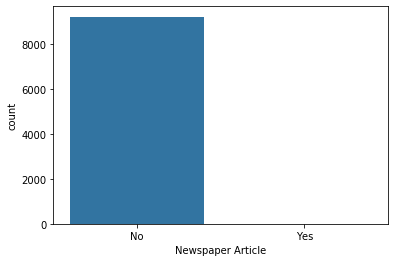

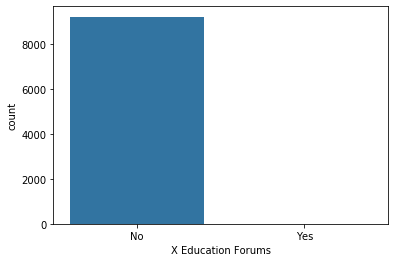

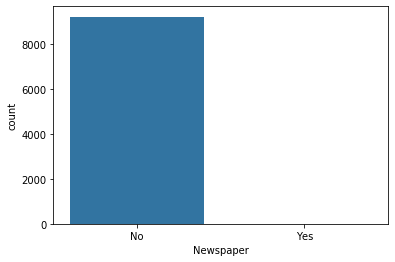

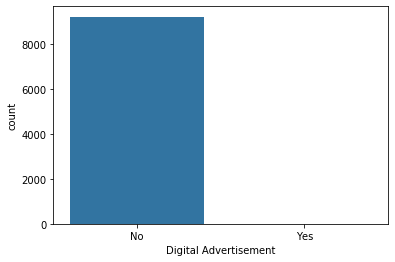

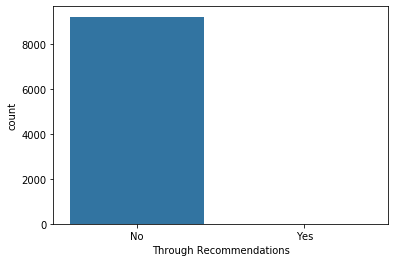

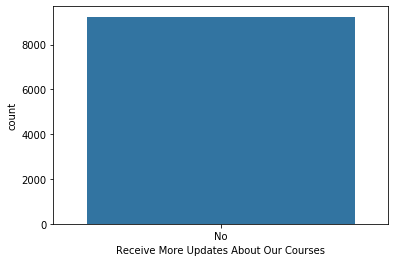

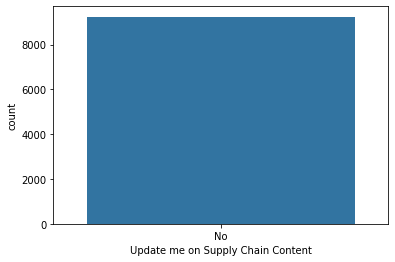

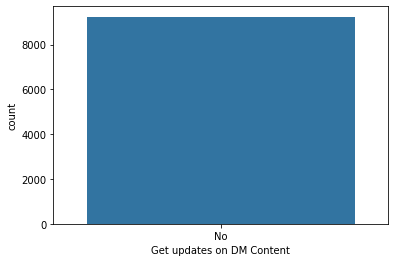

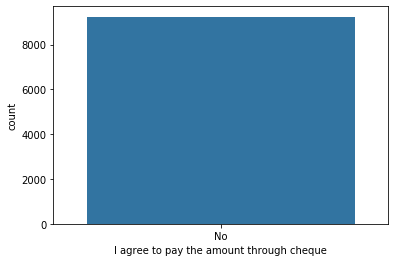

In [224]:
#Plotting Biased Column
cols = [  'Do Not Email', 'Do Not Call', 'Country',  'What is your current occupation',
        'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',   'Digital Advertisement', 'Through Recommendations',
        'Receive More Updates About Our Courses',  'Update me on Supply Chain Content', 
        'Get updates on DM Content',     'I agree to pay the amount through cheque',]

for i, j in enumerate(cols):
    
    plt.figure(figsize = (6,4))
    sns.countplot(j, data = leads)
    plt.show()

# Section 2 - Data Preparation

### Droppping Null and Biased Columns

In [225]:
leads.drop( ['Prospect ID',   'Do Not Email', 'Do Not Call', 'Country',  'How did you hear about X Education',
       'What is your current occupation',   'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',   'Digital Advertisement', 'Through Recommendations',
        'Receive More Updates About Our Courses', 'Tags',  'Update me on Supply Chain Content', 
        'Get updates on DM Content',  'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
        'Asymmetrique Activity Score',   'Asymmetrique Profile Score',   'I agree to pay the amount through cheque',
       'Last Notable Activity'], axis = 1, inplace = True)

In [226]:
#Checking Shape
leads.shape

(9240, 12)

In [227]:
#Checking head
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Lead Quality,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,Select,Low in Relevance,Select,No
1,660728,API,Organic Search,0,5.00,674,2.50,Email Opened,Select,NaN,Select,No
2,660727,Landing Page Submission,Direct Traffic,1,2.00,1532,2.00,Email Opened,Business Administration,Might be,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,0,1.00,305,1.00,Unreachable,Media and Advertising,Not Sure,Mumbai,No
4,660681,Landing Page Submission,Google,1,2.00,1428,1.00,Converted to Lead,Select,Might be,Mumbai,No


### Replacing Select with np.NaN

In [228]:
leads.replace('Select', np.NaN, inplace = True)

In [229]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Lead Quality,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,NaN,Low in Relevance,NaN,No
1,660728,API,Organic Search,0,5.00,674,2.50,Email Opened,NaN,NaN,NaN,No
2,660727,Landing Page Submission,Direct Traffic,1,2.00,1532,2.00,Email Opened,Business Administration,Might be,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,0,1.00,305,1.00,Unreachable,Media and Advertising,Not Sure,Mumbai,No
4,660681,Landing Page Submission,Google,1,2.00,1428,1.00,Converted to Lead,NaN,Might be,Mumbai,No


**`All the Select have been replace with np.NaN`**

In [230]:
# Finding % Column wise null value in Descending order
(leads.isnull().mean().sort_values(ascending = False)*100)

Lead Quality                             51.59
City                                     39.71
Specialization                           36.58
Page Views Per Visit                      1.48
TotalVisits                               1.48
Last Activity                             1.11
Lead Source                               0.39
A free copy of Mastering The Interview    0.00
Total Time Spent on Website               0.00
Converted                                 0.00
Lead Origin                               0.00
Lead Number                               0.00
dtype: float64

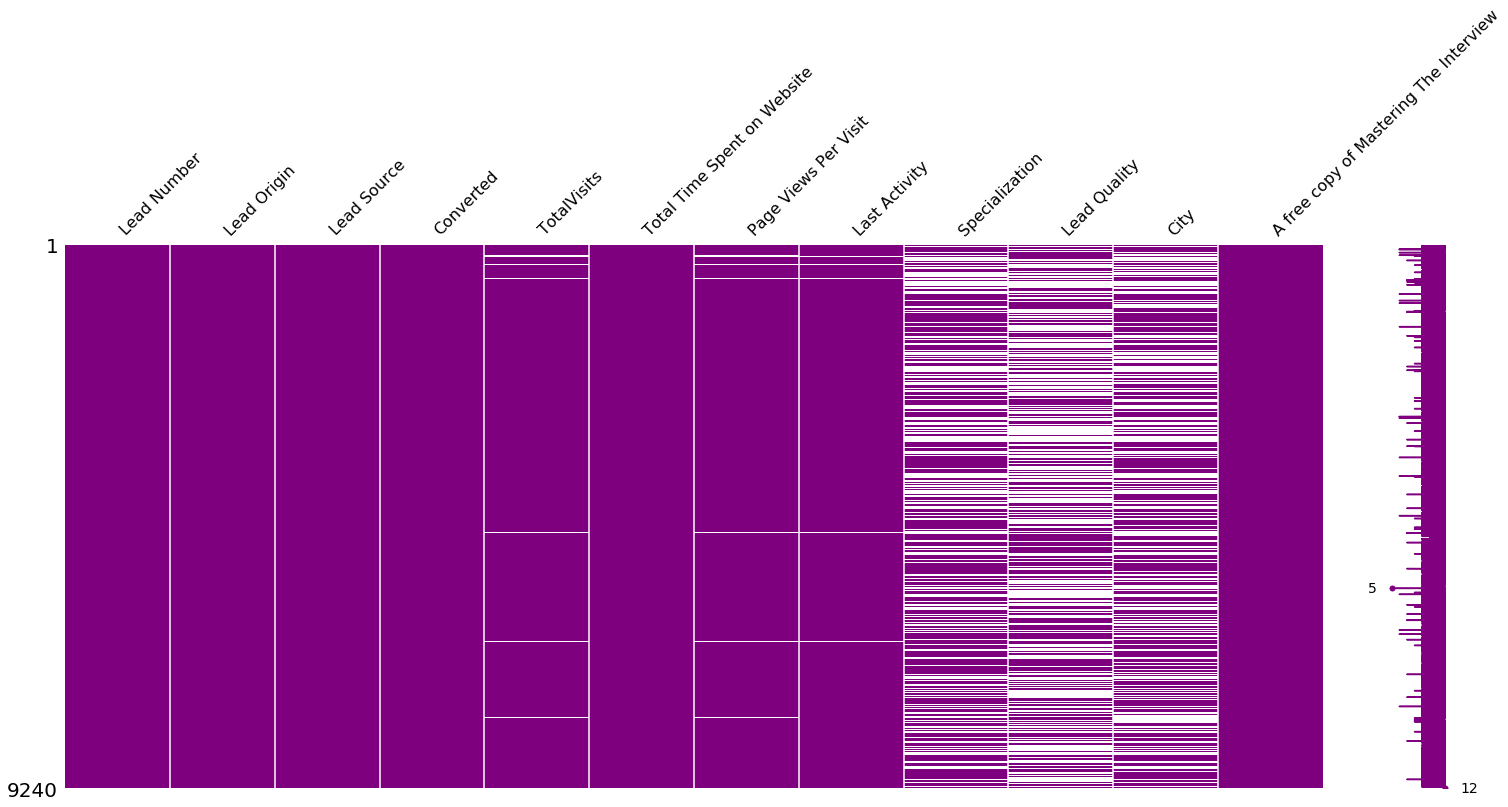

In [231]:
#Viewing Missing Values in Dataframe
# Missing values are seen in white color in each column
missingno.matrix(leads,color = (0.5, 0.0, 0.5))

### Renaming Null values of Lead Quality

In [232]:
leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [233]:
leads['Lead Quality'].isnull().value_counts()

True     4767
False    4473
Name: Lead Quality, dtype: int64

#### Replacing Null with " Unknown"

In [234]:
leads['Lead Quality'].fillna('Unknown', inplace = True)

In [235]:
leads['Lead Quality'].value_counts()

Unknown              4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

**`On dummifying we can drop this Unknown column`**

### Renaming Null values of City

In [236]:
leads['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [237]:
leads['City'].isnull().value_counts()

False    5571
True     3669
Name: City, dtype: int64

#### Replacing Null with " Unknown City"

In [238]:
leads['City'].fillna('Unknown City', inplace = True)

In [239]:
leads['City'].value_counts()

Unknown City                   3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

**`On dummifying we can drop this Unknown City column`**

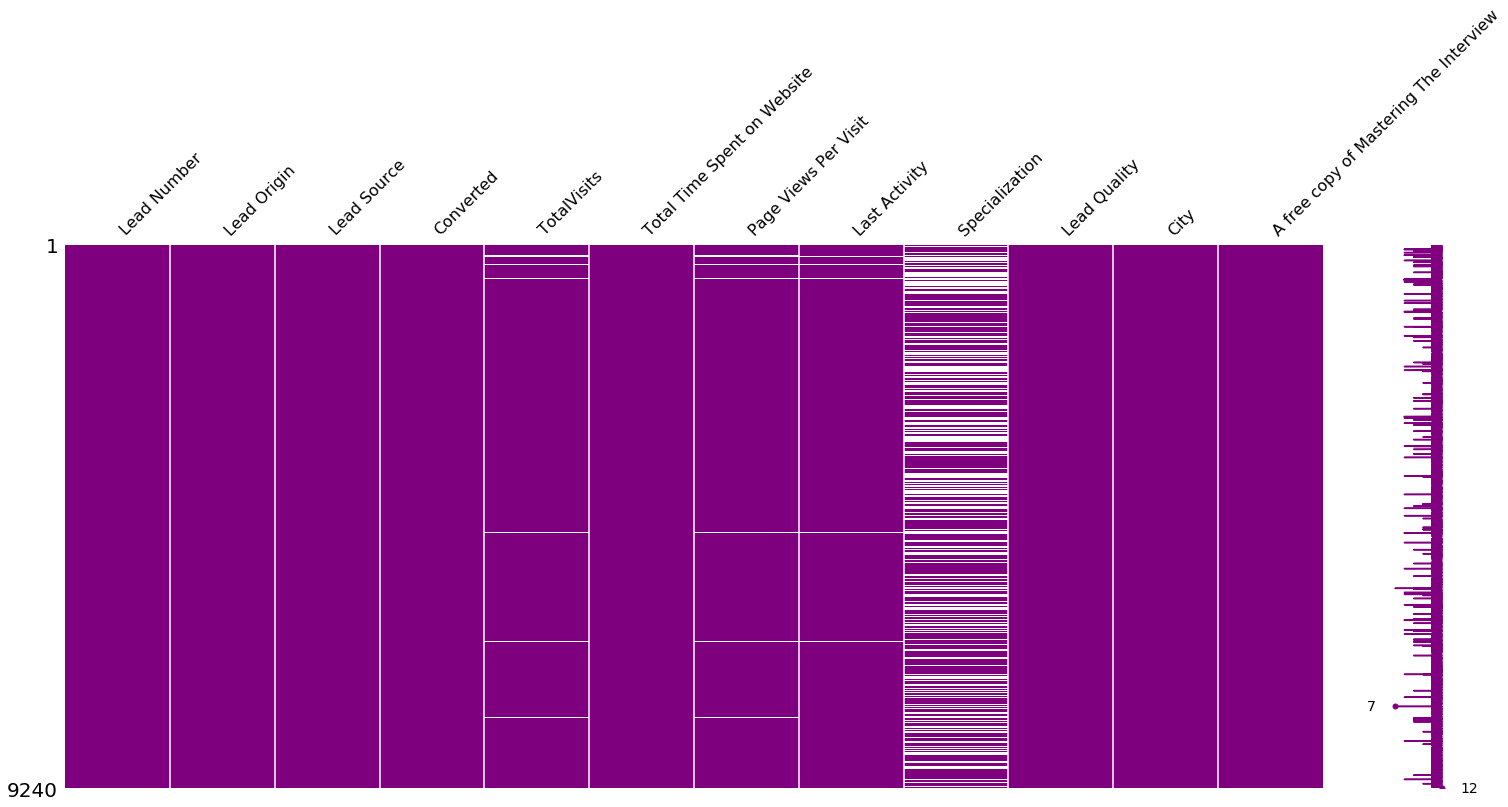

In [240]:
missingno.matrix(leads,color = (0.5, 0.0, 0.5))

### Renaming Null values of Specialization

In [241]:
leads['Specialization'].isnull().value_counts()

False    5860
True     3380
Name: Specialization, dtype: int64

In [242]:
leads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

#### Replacing Null with " Unknown_Spec"

In [243]:
leads['Specialization'].fillna("Unknown_Spec", inplace = True)

In [244]:
leads['Specialization'].value_counts()

Unknown_Spec                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

**`Unknown Spec can be Dropped  after dummifying`**

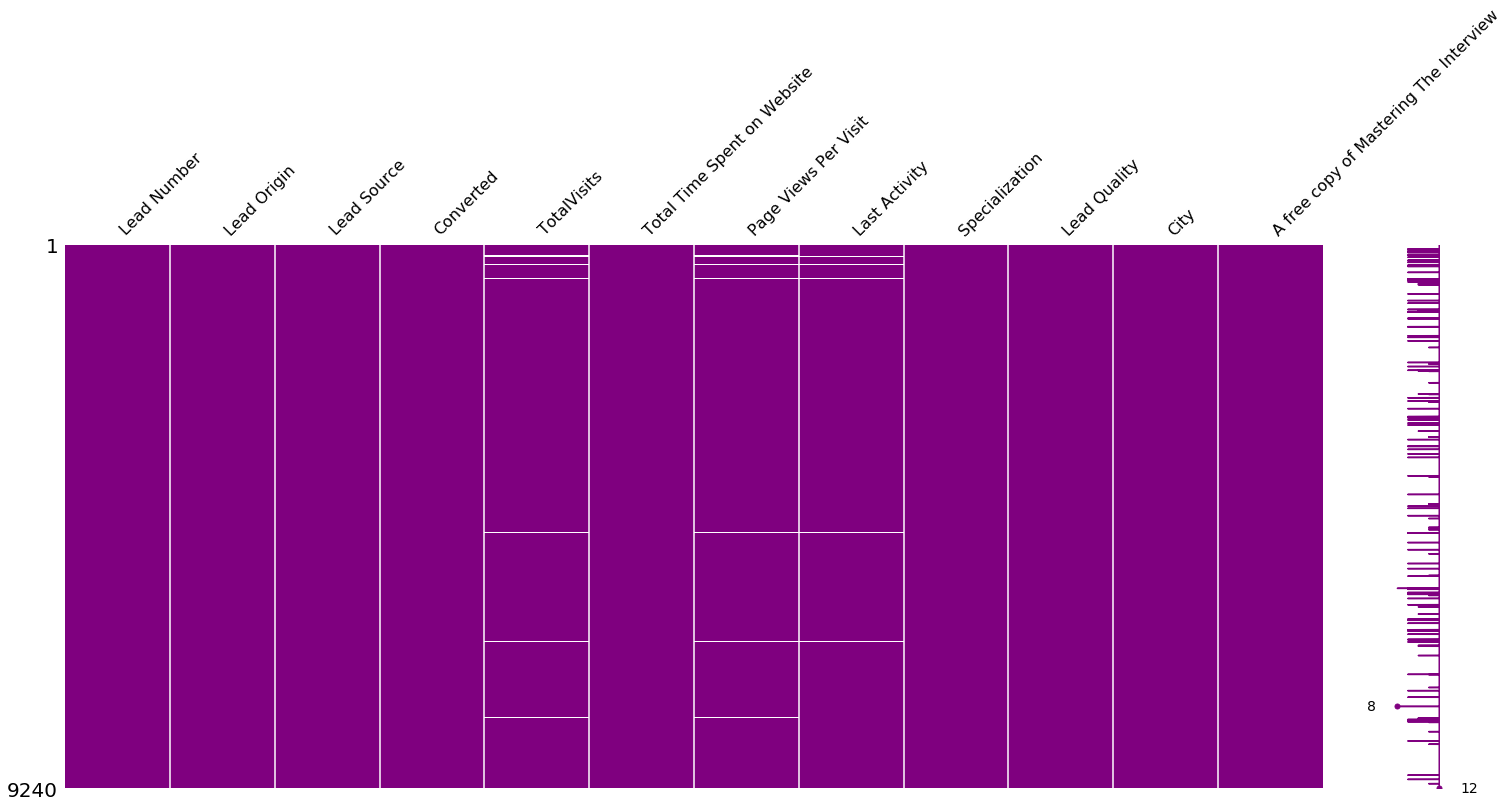

In [245]:
missingno.matrix(leads,color = (0.5, 0.0, 0.5))

### Dropping Null Values

In [246]:
leads.dropna(axis = 0, inplace = True)

In [247]:
leads.shape

(9074, 12)

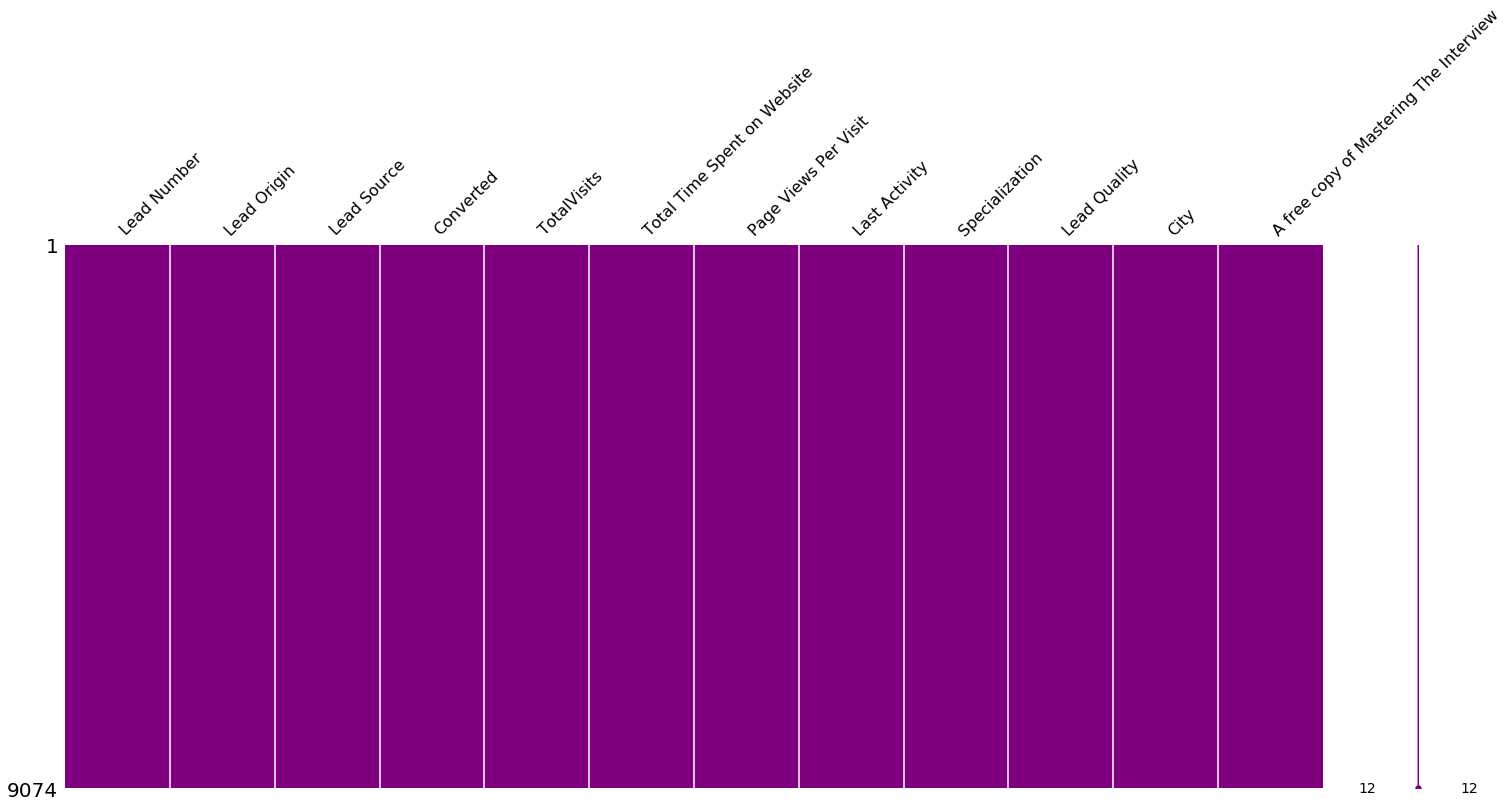

In [248]:
missingno.matrix(leads,color = (0.5, 0.0, 0.5))

## % Rows Retained

In [249]:
9074/9240

0.982034632034632

# 98.2 % Rows Retained and 12 Columns

### Binning Column Values

In [250]:
# Checking and Analysing value_counts of each column
col = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization']   # Columns of DataFrame 
for j, i in enumerate(col):
    print('Column ', j, ' ',i )
    print(leads[i].value_counts())
    print('                                     ')
    print('*************************************')
    print('                                     ')

Column  0   Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
                                     
*************************************
                                     
Column  1   Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
youtubechannel          1
WeLearn                 1
NC_EDM                  1
welearnblog_Home        1
Pay per Click Ads       1
blog                    1
testone                 1
Name: Lead Source, dtype: int64
                                     
*************************************
                        

 ### Combining Column Values

In [251]:
leads['Lead Origin'].replace({'Lead Add Form': "Other Leads",'Lead Import': "Other Leads", }, inplace = True)
leads['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Other Leads                 611
Name: Lead Origin, dtype: int64

**`Other leads can be Dropped after dummifying`**

In [252]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Lead Quality,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,Unknown_Spec,Low in Relevance,Unknown City,No
1,660728,API,Organic Search,0,5.00,674,2.50,Email Opened,Unknown_Spec,Unknown,Unknown City,No
2,660727,Landing Page Submission,Direct Traffic,1,2.00,1532,2.00,Email Opened,Business Administration,Might be,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,0,1.00,305,1.00,Unreachable,Media and Advertising,Not Sure,Mumbai,No
4,660681,Landing Page Submission,Google,1,2.00,1428,1.00,Converted to Lead,Unknown_Spec,Might be,Mumbai,No


In [253]:
leads['Lead Source'].replace({ 'google' : 'Google',
    
                              'Reference': "Other Sources",
                              'Welingak Website': "Other Sources",
                              'Referral Sites': "Other Sources",
                              'Facebook': "Other Sources",
                              'bing': "Other Sources",
                              'Click2call': "Other Sources",
                              'Social Media': "Other Sources",
                              'Press_Release': "Other Sources",
                              'Live Chat': "Other Sources",
                              'welearnblog_Home': "Other Sources",
                              'youtubechannel': "Other Sources",
                              'NC_EDM': "Other Sources",
                              'WeLearn': "Other Sources",
                              'blog': "Other Sources",
                              'Pay per Click Ads': "Other Sources",
                              'testone': "Other Sources",}, inplace = True)
leads['Lead Source'].value_counts()

Google            2873
Direct Traffic    2543
Olark Chat        1753
Organic Search    1154
Other Sources      751
Name: Lead Source, dtype: int64

**`Other Sources can be Dropped after dummifying`**

In [254]:
leads['Last Activity'].replace({
                              'Unsubscribed': "Other Activity",
                              'Had a Phone Conversation': "Other Activity",
                              'View in browser link Clicked': "Other Activity",
                              'Approached upfront': "Other Activity",
                              'Email Received': "Other Activity",
                              'Email Marked Spam': "Other Activity",
                              'Visited Booth in Tradeshow': "Other Activity",
                              'Resubscribed to emails': "Other Activity",}, inplace = True)
leads['Last Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Other Activity                101
Unreachable                    90
Name: Last Activity, dtype: int64

**`Other Activity can be Dropped after dummifying`**

### Outlier Treatment Capping

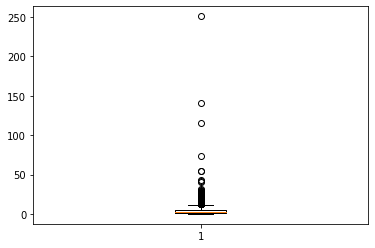

In [255]:
#Boxplot
plt.boxplot(leads['TotalVisits'])
plt.show()


In [256]:
#Checking Skew and Stats
print(leads['TotalVisits'].skew())
leads['TotalVisits'].describe()

19.921090597349476


count   9074.00
mean       3.46
std        4.86
min        0.00
25%        1.00
50%        3.00
75%        5.00
max      251.00
Name: TotalVisits, dtype: float64

In [257]:
#Checking Quantile
print(leads['TotalVisits'].quantile(0.10))
print(leads['TotalVisits'].quantile(0.99))

0.0
17.0


In [258]:
# Converting Outliers to 99% value
leads['TotalVisits'] = np.where(leads['TotalVisits'] > 17.0, 17.0 ,leads['TotalVisits'])
leads['TotalVisits'].skew()

1.6072986272130092

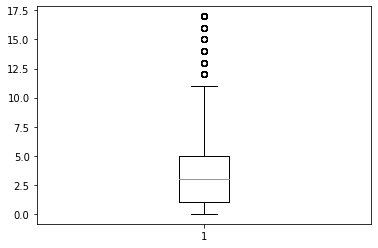

In [259]:
#Checking Bokplots after converting
plt.boxplot(leads['TotalVisits'])
plt.show()

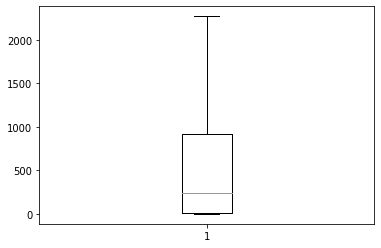

In [260]:
#Boxplot
plt.boxplot(leads['Total Time Spent on Website'])
plt.show()

In [261]:
#Checking Skew and Stats
print(leads['Total Time Spent on Website'].skew())
leads['Total Time Spent on Website'].describe()

0.9707033718050979


count   9074.00
mean     482.89
std      545.26
min        0.00
25%       11.00
50%      246.00
75%      922.75
max     2272.00
Name: Total Time Spent on Website, dtype: float64

In [262]:
#Checking Quantile
print(leads['Total Time Spent on Website'].quantile(0.10))
print(leads['Total Time Spent on Website'].quantile(0.99))

0.0
1839.0


In [263]:
# Converting Outliers to 99% value
leads['Total Time Spent on Website'] = np.where(leads['Total Time Spent on Website'] > 1839.0, 1839.0 ,leads['Total Time Spent on Website'])
leads['Total Time Spent on Website'].skew()

0.9477866220328085

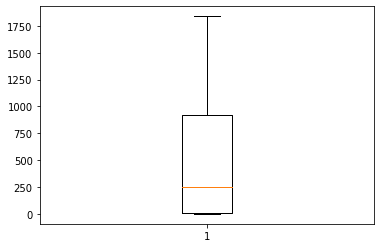

In [264]:
#Checking Bokplots after converting
plt.boxplot(leads['Total Time Spent on Website'])
plt.show()

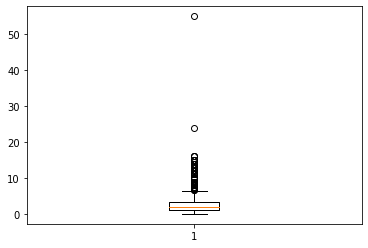

In [265]:
#Boxplot
plt.boxplot(leads['Page Views Per Visit'])
plt.show()

In [266]:
#Checking Skew and Stats
print(leads['Page Views Per Visit'].skew())
leads['Page Views Per Visit'].describe()

2.8770193832319992


count   9074.00
mean       2.37
std        2.16
min        0.00
25%        1.00
50%        2.00
75%        3.20
max       55.00
Name: Page Views Per Visit, dtype: float64

In [267]:
#Checking Quantile
print(leads['Page Views Per Visit'].quantile(0.10))
print(leads['Page Views Per Visit'].quantile(0.99))

0.0
9.0


In [268]:
# Converting Outliers to 99% value
leads['Page Views Per Visit'] = np.where(leads['Page Views Per Visit'] > 9.0, 9.0 ,leads['Page Views Per Visit'])
leads['Page Views Per Visit'].skew()

0.9122651190448876

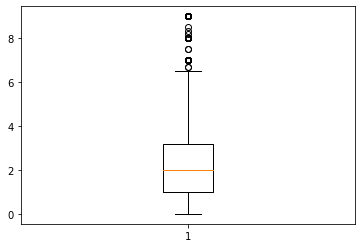

In [269]:
#Checking Bokplots after converting
plt.boxplot(leads['Page Views Per Visit'])
plt.show()

### Remnaming Columns

In [270]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Lead Quality', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [271]:
leads.rename(columns = {'Total Time Spent on Website': "Website Time", 'Page Views Per Visit':"Page Views", 
                        'A free copy of Mastering The Interview': 'Free Copy', 
                        'Last Notable Activity': "LastNotableAct"}, inplace = True)

In [272]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Website Time', 'Page Views', 'Last Activity', 'Specialization',
       'Lead Quality', 'City', 'Free Copy'],
      dtype='object')

In [273]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Website Time,Page Views,Last Activity,Specialization,Lead Quality,City,Free Copy
0,660737,API,Olark Chat,0,0.00,0.00,0.00,Page Visited on Website,Unknown_Spec,Low in Relevance,Unknown City,No
1,660728,API,Organic Search,0,5.00,674.00,2.50,Email Opened,Unknown_Spec,Unknown,Unknown City,No
2,660727,Landing Page Submission,Direct Traffic,1,2.00,1532.00,2.00,Email Opened,Business Administration,Might be,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,0,1.00,305.00,1.00,Unreachable,Media and Advertising,Not Sure,Mumbai,No
4,660681,Landing Page Submission,Google,1,2.00,1428.00,1.00,Converted to Lead,Unknown_Spec,Might be,Mumbai,No


In [274]:
#Checking Statistical Analysis
leads.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9074.00,617032.62,23348.03,579533.00,596406.00,615278.50,637176.50,660737.00
Converted,9074.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00
TotalVisits,9074.00,3.34,3.25,0.00,1.00,3.00,5.00,17.00
Website Time,9074.00,481.76,542.22,0.00,11.00,246.00,922.75,1839.00
Page Views,9074.00,2.34,1.98,0.00,1.00,2.00,3.20,9.00


# Section 3 - EDA

In [275]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Website Time,Page Views,Last Activity,Specialization,Lead Quality,City,Free Copy
0,660737,API,Olark Chat,0,0.00,0.00,0.00,Page Visited on Website,Unknown_Spec,Low in Relevance,Unknown City,No
1,660728,API,Organic Search,0,5.00,674.00,2.50,Email Opened,Unknown_Spec,Unknown,Unknown City,No
2,660727,Landing Page Submission,Direct Traffic,1,2.00,1532.00,2.00,Email Opened,Business Administration,Might be,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,0,1.00,305.00,1.00,Unreachable,Media and Advertising,Not Sure,Mumbai,No
4,660681,Landing Page Submission,Google,1,2.00,1428.00,1.00,Converted to Lead,Unknown_Spec,Might be,Mumbai,No


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

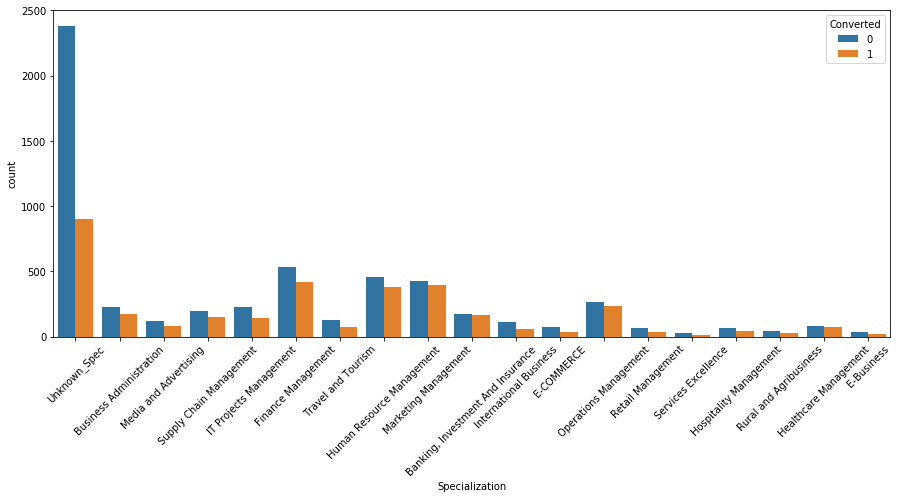

In [276]:
plt.figure(figsize = (15, 6))
sns.countplot(data = leads,  x ="Specialization", orient="v", hue = 'Converted' )
plt.xticks(rotation = 45)

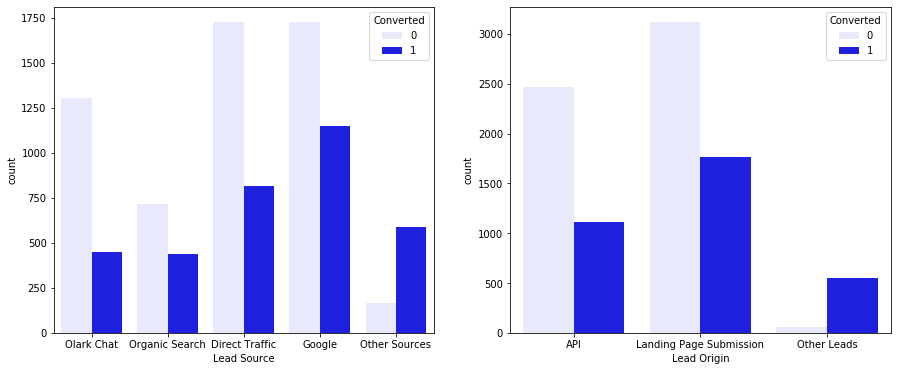

In [277]:
# CountPlots
fig, axs = plt.subplots(1,2,figsize = (15,6))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads, ax = axs[0], color = 'blue')
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads, ax = axs[1], color = 'blue')
plt.show()

**Lead Source from Google has comparatively more conversion than rest**

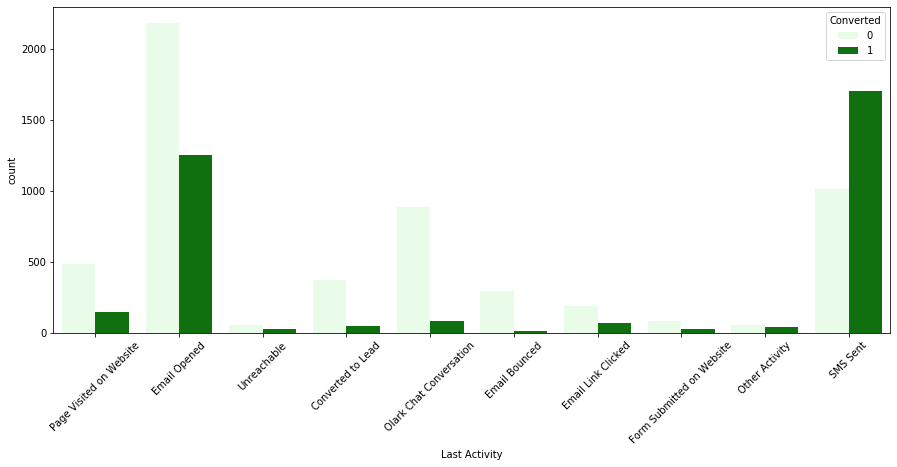

In [278]:
plt.figure(figsize = (15, 6))
sns.countplot(data = leads,  x ="Last Activity", orient="v", hue = 'Converted' , color = 'green')
plt.xticks(rotation = 45)
plt.show()

**People with Last Activity as SMS Sent have higher conversion**

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

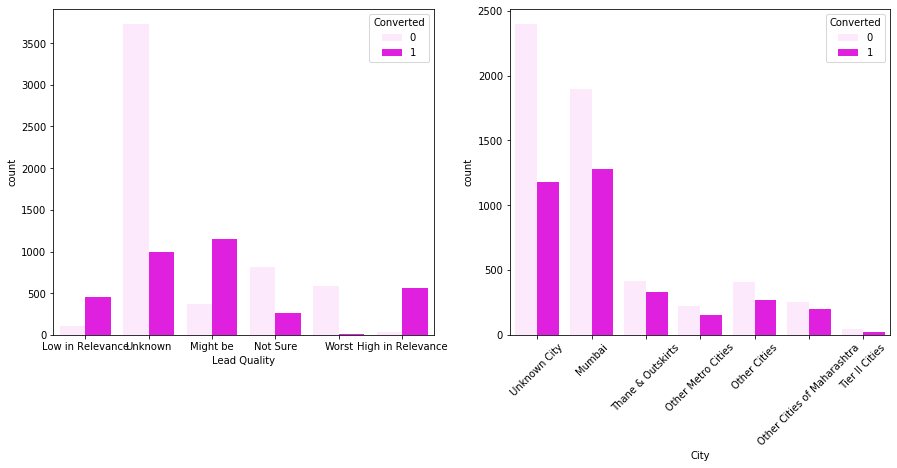

In [279]:
fig, axs = plt.subplots(1,2,figsize = (15,6))
sns.countplot(x = "Lead Quality", hue = "Converted", data = leads, ax = axs[0], color = 'magenta')
sns.countplot(x = "City", hue = "Converted", data = leads, ax = axs[1], color = 'magenta')
plt.xticks(rotation = 45)

**Mumbai is comparitively mor than other cities**

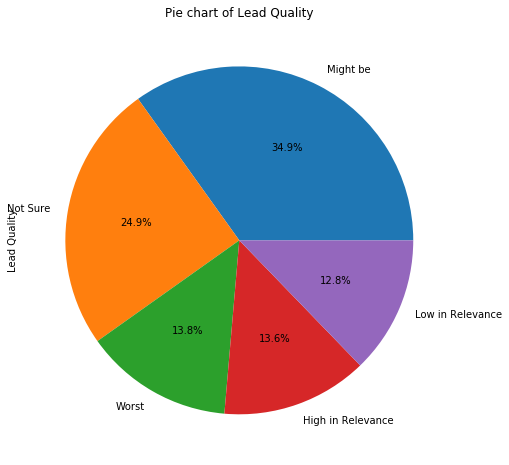

In [280]:
plt.figure(figsize = (12,8))
leads['Lead Quality'][leads['Lead Quality'] != 'Unknown'].value_counts().plot.pie(autopct='%1.1f%%' )
plt.title("Pie chart of Lead Quality")
plt.show()

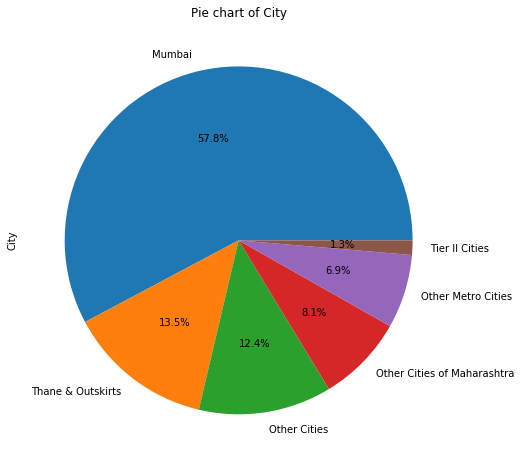

In [281]:
plt.figure(figsize = (12,8))
leads['City'][leads['City'] != 'Unknown City'].value_counts().plot.pie(autopct='%1.1f%%' )
plt.title("Pie chart of City")
plt.show()

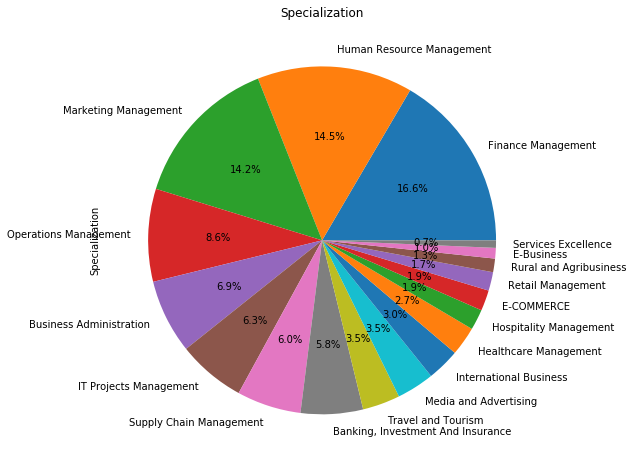

In [282]:
plt.figure(figsize = (12,8))
leads['Specialization'][leads['Specialization'] != 'Unknown_Spec'].value_counts().plot.pie( autopct='%1.1f%%')
plt.title("Specialization")
plt.show()

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

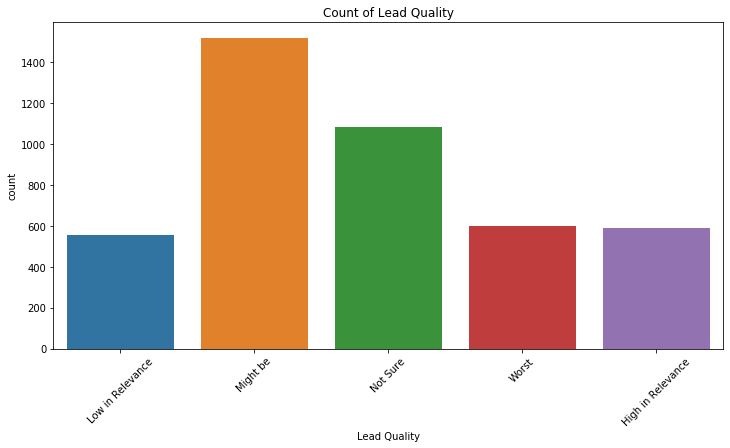

In [283]:
plt.figure(figsize = (12,6))
sns.countplot(leads['Lead Quality'][leads['Lead Quality'] != 'Unknown'].values, data = leads )
plt.xlabel('Lead Quality')
plt.title("Count of Lead Quality")
plt.xticks(rotation = 45)

**There are more people who are uncertain**

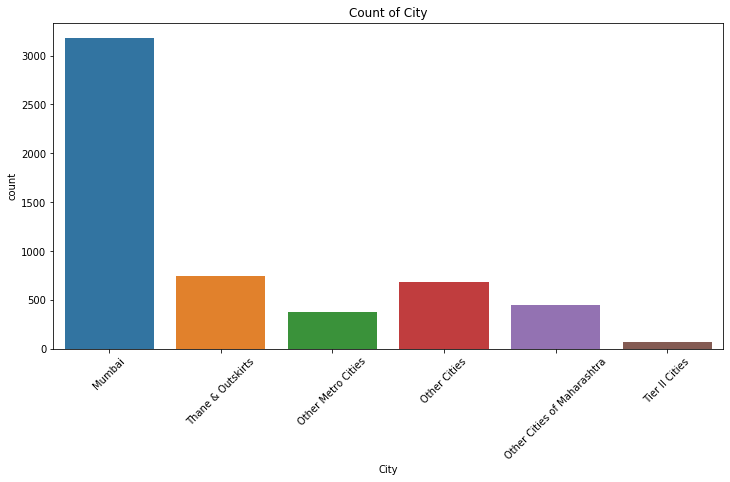

In [284]:
plt.figure(figsize = (12,6))
sns.countplot(leads['City'][leads['City'] != 'Unknown City'].values, data = leads )
plt.xlabel('City')
plt.title("Count of City")
plt.xticks(rotation = 45)
plt.show()

**Maximum queries are from Mumbai**

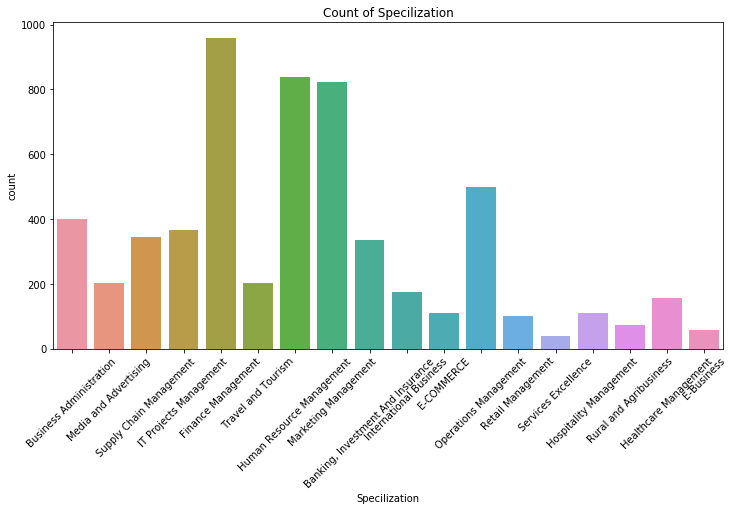

In [285]:
plt.figure(figsize = (12,6))
sns.countplot(leads['Specialization'][leads['Specialization'] != 'Unknown_Spec'].values,data = leads )
plt.xticks(rotation = 45)
plt.xlabel("Specilization")
plt.title("Count of Specilization")
plt.show()

**IT  Project Mgmt., Travel and Tourism and HR Mgmt. enquire most**

### Creating Dummies

In [286]:
leads.shape

(9074, 12)

In [287]:
leads = pd.get_dummies(leads, columns = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                                         'Lead Quality','City'],  drop_first= False)
leads.head()

,Lead Number,Converted,TotalVisits,Website Time,Page Views,Free Copy,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Other Leads,Lead Source_Direct Traffic,...,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown City
0,660737,0,0.00,0.00,0.00,No,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,660728,0,5.00,674.00,2.50,No,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,660727,1,2.00,1532.00,2.00,Yes,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
3,660719,0,1.00,305.00,1.00,No,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0
4,660681,1,2.00,1428.00,1.00,No,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [288]:
leads.shape

(9074, 56)

In [289]:
leads['Free Copy'] = leads['Free Copy'].map({'No' : 0, 'Yes': 1})
leads.head()

,Lead Number,Converted,TotalVisits,Website Time,Page Views,Free Copy,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Other Leads,Lead Source_Direct Traffic,...,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown City
0,660737,0,0.00,0.00,0.00,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,660728,0,5.00,674.00,2.50,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,660727,1,2.00,1532.00,2.00,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
3,660719,0,1.00,305.00,1.00,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0
4,660681,1,2.00,1428.00,1.00,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


### Checking Data Types

In [290]:
leads.dtypes.value_counts()

uint8      50
int64       3
float64     3
dtype: int64

**`All Variables are Numeric`**

In [291]:
#Checking Null
leads.isnull().sum()

Lead Number                                         0
Converted                                           0
TotalVisits                                         0
Website Time                                        0
Page Views                                          0
Free Copy                                           0
Lead Origin_API                                     0
Lead Origin_Landing Page Submission                 0
Lead Origin_Other Leads                             0
Lead Source_Direct Traffic                          0
Lead Source_Google                                  0
Lead Source_Olark Chat                              0
Lead Source_Organic Search                          0
Lead Source_Other Sources                           0
Last Activity_Converted to Lead                     0
Last Activity_Email Bounced                         0
Last Activity_Email Link Clicked                    0
Last Activity_Email Opened                          0
Last Activity_Form Submitted

### Dropping Unwanted columns

In [292]:
leads.drop(['Lead Origin_Other Leads',  'Lead Source_Other Sources','Last Activity_Other Activity',
 'Specialization_Unknown_Spec', 'Lead Quality_Unknown','City_Unknown City'], axis = 1 , inplace = True)
leads.shape

(9074, 50)

### Creating Separate Copy for Future Analysis

In [293]:
myleads = leads.copy()
myleads.head()

,Lead Number,Converted,TotalVisits,Website Time,Page Views,Free Copy,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,...,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,660737,0,0.00,0.00,0.00,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,660728,0,5.00,674.00,2.50,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.00,1532.00,2.00,1,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
3,660719,0,1.00,305.00,1.00,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
4,660681,1,2.00,1428.00,1.00,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0


# Section 4 - Model Building and Analysis

In [294]:
from sklearn.model_selection import train_test_split

In [295]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)
X.head()

,Lead Number,TotalVisits,Website Time,Page Views,Free Copy,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,...,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,660737,0.00,0.00,0.00,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,660728,5.00,674.00,2.50,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,2.00,1532.00,2.00,1,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,660719,1.00,305.00,1.00,0,0,1,1,0,0,...,0,0,1,0,1,0,0,0,0,0
4,660681,2.00,1428.00,1.00,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [296]:
X.shape

(9074, 49)

In [297]:
# Putting target variable to y
y = leads[['Lead Number', 'Converted']]
y.head()

,Lead Number,Converted
0,660737,0
1,660728,0
2,660727,1
3,660719,0
4,660681,1


In [298]:
y.shape

(9074, 2)

### Splitting Data

In [299]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling Data

In [300]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Website Time','Page Views']] = scaler.fit_transform(X_train[['TotalVisits','Website Time','Page Views']])
X_train.head()

### Conversion Rate

In [302]:
### Checking the Conversion Rate
conversion = (sum(leads['Converted'])/len(leads['Converted'].index))*100
conversion

37.85541106458012

## We have almost 38% conversion rate

### Checking Correlations

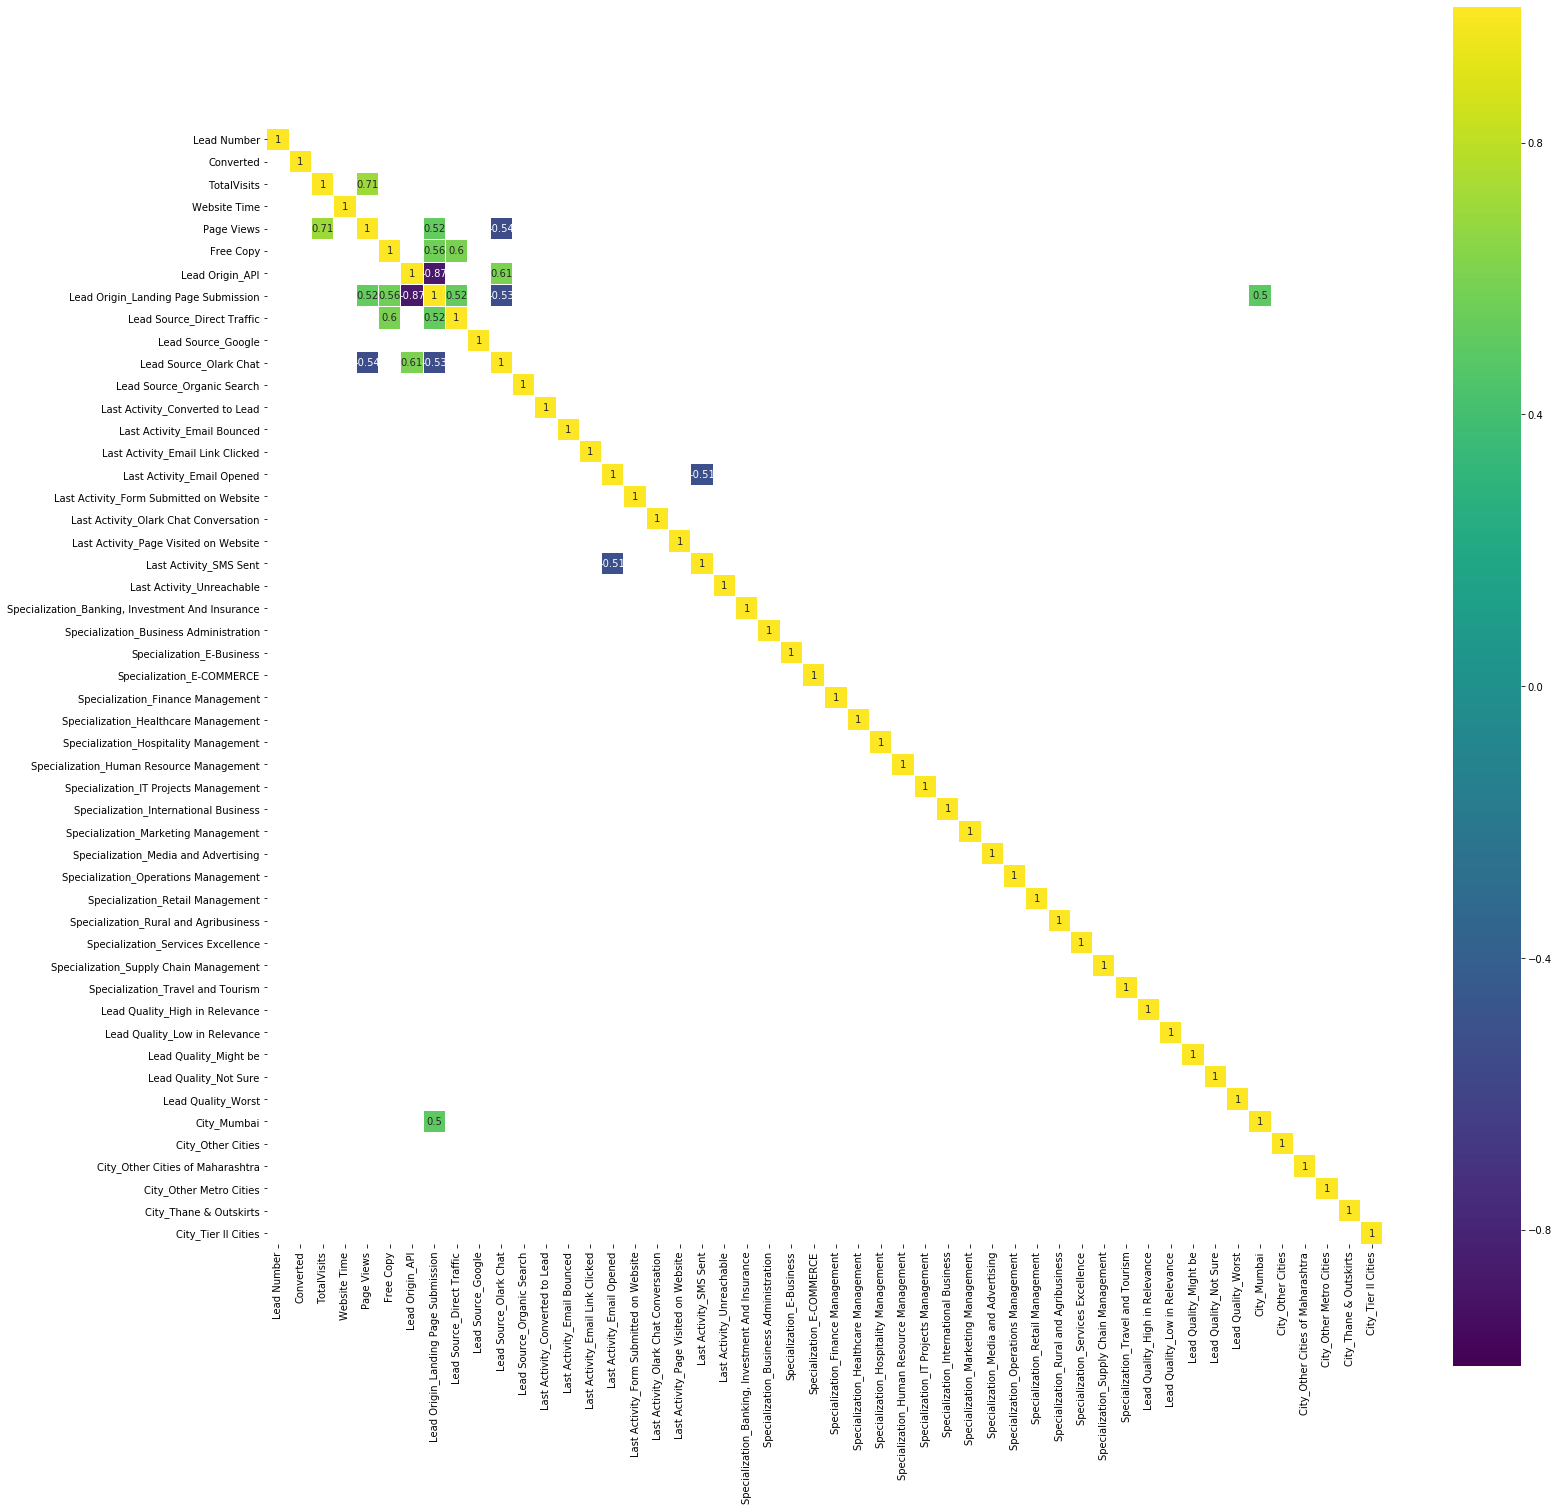

In [303]:
# Let's see the correlation matrix 

corr = leads.corr()

plt.figure(figsize=(25, 25))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True);

### Dropping highly correlated dummy variables above +/-0.8


- Lead Origin_Landing Page Submission ~ Lead_Origin_API  = 0.87


In [304]:
X_train.drop('Lead Origin_Landing Page Submission' , axis = 1, inplace = True)

In [305]:
X_test.drop('Lead Origin_Landing Page Submission' , axis = 1, inplace = True)

### Model Building

In [306]:
import statsmodels.api as sm

In [307]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train.iloc[:, 1:])), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Generalized Linear Model Regression Results                       
========================================================================================
Dep. Variable:     ['Lead Number', 'Converted']   No. Observations:                 6351
Model:                                      GLM   Df Residuals:                     6303
Model Family:                          Binomial   Df Model:                           47
Link Function:                            logit   Scale:                          1.0000
Method:                                    IRLS   Log-Likelihood:                -3812.0
Date:                          Mon, 01 Jun 2020   Deviance:                       2732.0
Time:                                  21:29:59   Pearson chi2:                 3.08e+03
No. Iterations:                             100   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               14.2281      0.183     77.746      0.000      13.869      14.587
TotalVisits                                         -0.0792      0.029     -2.775      0.006      -0.135      -0.023
Website Time                                        -0.3698      0.022    -16.719      0.000      -0.413      -0.326
Page Views                                           0.1529      0.033      4.637      0.000       0.088       0.218
Free Copy                                            0.0310      0.064      0.480      0.631      -0.095       0.157
Lead Origin_API                                      0.1274      0.075      1.709      0.087      -0.019       0.274
Lead Source_Direct Traffic                           0.6379      0.089      7.179      0.000       0.464       0.812
Lead Source_Google                                   0.5187      0.083      6.258      0.000       0.356       0.681
Lead Source_Olark Chat                               0.1487      0.100      1.493      0.135      -0.046       0.344
Lead Source_Organic Search                           0.5381      0.102      5.263      0.000       0.338       0.739
Last Activity_Converted to Lead                      0.7517      0.243      3.091      0.002       0.275       1.228
Last Activity_Email Bounced                          1.5435      0.374      4.124      0.000       0.810       2.277
Last Activity_Email Link Clicked                     0.2097      0.219      0.956      0.339      -0.220       0.640
Last Activity_Email Opened                           0.0022      0.169      0.013      0.990      -0.329       0.334
Last Activity_Form Submitted on Website              0.2872      0.290      0.991      0.322      -0.281       0.855
Last Activity_Olark Chat Conversation                1.0584      0.212      4.983      0.000       0.642       1.475
Last Activity_Page Visited on Website                0.3059      0.192      1.591      0.112      -0.071       0.683
Last Activity_SMS Sent                              -0.4191      0.169     -2.487      0.013      -0.749      -0.089
Last Activity_Unreachable                            0.1349      0.267      0.504      0.614      -0.389       0.659
Specialization_Banking, Investment And Insurance    -0.0524      0.115     -0.454      0.650      -0.279       0.174
Specialization_Business Administration               0.0843      0.118      0.714      0.475      -0.147       0.316
Specialization_E-Business                           -0.1345      0.256     -0.526      0.599      -0.636       0.367
Specialization_E-COMMERCE                           -0.1065      0.213     -0.500      0.617      -0.524       0.311
Specialization_Finan

### Feature Selection Using RFE

In [308]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [309]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train.iloc[:, 1:], y_train.iloc[:, 1:].values.reshape(-1))

In [310]:
rfe.support_

array([False,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True,  True, False,  True, False, False, False, False,
       False, False])

In [311]:
list(zip(X_train.iloc[:, 1:].columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 18),
 ('Website Time', True, 1),
 ('Page Views', False, 2),
 ('Free Copy', False, 29),
 ('Lead Origin_API', False, 15),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 30),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 23),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 24),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 31),
 ('Specialization_Banking, Investment And Insurance', False, 3),
 ('Specialization_Business Administration', False, 22),
 ('Specialization_E-Business', False, 9),
 ('Specialization_E-COMMERCE', False, 8),
 ('Specialization_Finance Management', False, 17),
 ('Specializatio

In [312]:
col = X_train.iloc[:, 1:].columns[rfe.support_]

In [313]:
X_train.iloc[:, 1:].columns[~rfe.support_]

Index(['TotalVisits', 'Page Views', 'Free Copy', 'Lead Origin_API',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'Specialization_Travel 

### Assessing the model with StatsModels

In [314]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train.iloc[:, 1:].values.reshape(-1),X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2320.6
Date:                Mon, 01 Jun 2020   Deviance:                       4641.2
Time:                        21:30:09   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.1353      0.167      0.810      0.418      -0.192       0.463
Website Time                              1.0690      0.044     24.410      0.000       0.983       1.155
Lead Source_Direct Traffic               -2.6960      0.156    -17.335      0.000      -3.001      -2.391
Lead Source_Google                       -2.3062      0.150    -15.380      0.000      -2.600      -2.012
Lead Source_Olark Chat                   -0.9178      0.155     -5.917      0.000      -1.222      -0.614
Lead Source_Organic Search               -2.5639      0.172    -14.949      0.000      -2.900      -2.228
Last Activity_Converted to Lead          -0.6940      0.253     -2.745      0.006      -1.189      -0.199
Last Activity_Email Bounced              -1.4153      0.389     -3.642      0.000      -2.177      -0.654
Last Activity_Email Opened                0.3802      0.124      3.076      0.002       0.138       0.622
Last Activity_Olark Chat Conversation    -1.1331      0.202     -5.607      0.000      -1.529      -0.737
Last Activity_SMS Sent                    1.5382      0.125     12.352      0.000       1.294       1.782
Specialization_Services Excellence       -0.7186      0.758     -0.949      0.343      -2.203       0.766
Lead Quality_High in Relevance            4.0615      0.240     16.935      0.000       3.591       4.532
Lead Quality_Low in Relevance             2.9292      0.159     18.443      0.000       2.618       3.240
Lead Quality_Might be                     2.0311      0.096     21.103      0.000       1.842       2.220
Lead Quality_Worst                       -2.1442      0.374     -5.729      0.000      -2.878      -1.411
=========================================================================================================
"""

In [315]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009   0.09
1012   0.01
9226   0.45
4750   0.68
7987   0.76
1281   0.92
2880   0.06
4971   0.80
7536   0.99
1248   0.73
dtype: float64

In [316]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08701617, 0.01041281, 0.45088079, 0.67817786, 0.75907289,
       0.91572576, 0.06090508, 0.80458564, 0.98958289, 0.7263297 ])

In [317]:
#Creating a dataframe with the actual Converted and the Predicted Converted probabilities
y_train_pred_final = pd.DataFrame({'Lead Number': y_train.iloc[:, :1].values.reshape(-1), 'Converted':y_train.iloc[:, 1:].values.reshape(-1), 'Convert_Prob':y_train_pred})
y_train_pred_final.head()

,Lead Number,Converted,Convert_Prob
0,630949,0,0.09
1,649355,0,0.01
2,579735,0,0.45
3,614238,1,0.68
4,588625,1,0.76


In [318]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead Number,Converted,Convert_Prob,predicted
0,630949,0,0.09,0
1,649355,0,0.01,0
2,579735,0,0.45,0
3,614238,1,0.68,1
4,588625,1,0.76,1


In [319]:
from sklearn import metrics

In [320]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3475  430]
 [ 632 1814]]


In [321]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8327822390174776


### Checking VIF

In [322]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [323]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_Email Opened,2.84
9,Last Activity_SMS Sent,2.56
2,Lead Source_Google,2.40
1,Lead Source_Direct Traffic,2.26
3,Lead Source_Olark Chat,2.19
8,Last Activity_Olark Chat Conversation,1.80
4,Lead Source_Organic Search,1.55
13,Lead Quality_Might be,1.40
0,Website Time,1.27
5,Last Activity_Converted to Lead,1.25


#### Dropping "Specialization_Services Excellence" because of high p value

In [324]:
col = col.drop('Specialization_Services Excellence', 1)
col

Index(['Website Time', 'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Lead Quality_High in Relevance',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Worst'],
      dtype='object')

In [325]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train.iloc[:, 1:].values.reshape(-1),X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2321.1
Date:                Mon, 01 Jun 2020   Deviance:                       4642.2
Time:                        21:30:11   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.1315      0.167      0.787      0.431      -0.196       0.459
Website Time                              1.0692      0.044     24.415      0.000       0.983       1.155
Lead Source_Direct Traffic               -2.6976      0.155    -17.355      0.000      -3.002      -2.393
Lead Source_Google                       -2.3039      0.150    -15.374      0.000      -2.598      -2.010
Lead Source_Olark Chat                   -0.9149      0.155     -5.902      0.000      -1.219      -0.611
Lead Source_Organic Search               -2.5624      0.171    -14.948      0.000      -2.898      -2.226
Last Activity_Converted to Lead          -0.6909      0.253     -2.733      0.006      -1.186      -0.195
Last Activity_Email Bounced              -1.4180      0.388     -3.651      0.000      -2.179      -0.657
Last Activity_Email Opened                0.3816      0.124      3.088      0.002       0.139       0.624
Last Activity_Olark Chat Conversation    -1.1322      0.202     -5.604      0.000      -1.528      -0.736
Last Activity_SMS Sent                    1.5394      0.124     12.365      0.000       1.295       1.783
Lead Quality_High in Relevance            4.0605      0.240     16.927      0.000       3.590       4.531
Lead Quality_Low in Relevance             2.9309      0.159     18.454      0.000       2.620       3.242
Lead Quality_Might be                     2.0295      0.096     21.096      0.000       1.841       2.218
Lead Quality_Worst                       -2.1432      0.374     -5.727      0.000      -2.877      -1.410
=========================================================================================================
"""

In [326]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [327]:
y_train_pred[:10]

array([0.08669153, 0.01032796, 0.45087761, 0.67730768, 0.75835719,
       0.91558003, 0.06088196, 0.80457002, 0.98953531, 0.72554556])

In [328]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [329]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead Number,Converted,Convert_Prob,predicted
0,630949,0,0.09,0
1,649355,0,0.01,0
2,579735,0,0.45,0
3,614238,1,0.68,1
4,588625,1,0.76,1


In [330]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8327822390174776


### Checking VIF again

In [331]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_Email Opened,2.84
9,Last Activity_SMS Sent,2.56
2,Lead Source_Google,2.40
1,Lead Source_Direct Traffic,2.26
3,Lead Source_Olark Chat,2.19
8,Last Activity_Olark Chat Conversation,1.80
4,Lead Source_Organic Search,1.55
12,Lead Quality_Might be,1.40
0,Website Time,1.27
5,Last Activity_Converted to Lead,1.25


#### Dropping 'Last Activity_Converted to Lead' having p value

In [332]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('Last Activity_Converted to Lead')
col

Index(['Website Time', 'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Lead Quality_High in Relevance', 'Lead Quality_Low in Relevance',
       'Lead Quality_Might be', 'Lead Quality_Worst'],
      dtype='object')

In [333]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train.iloc[:, 1:].values.reshape(-1),X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2325.1
Date:                Mon, 01 Jun 2020   Deviance:                       4650.1
Time:                        21:30:12   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.0052      0.160     -0.032      0.974      -0.319       0.309
Website Time                              1.0697      0.044     24.472      0.000       0.984       1.155
Lead Source_Direct Traffic               -2.7115      0.155    -17.469      0.000      -3.016      -2.407
Lead Source_Google                       -2.3093      0.150    -15.429      0.000      -2.603      -2.016
Lead Source_Olark Chat                   -0.9063      0.155     -5.848      0.000      -1.210      -0.603
Lead Source_Organic Search               -2.5764      0.171    -15.064      0.000      -2.912      -2.241
Last Activity_Email Bounced              -1.2711      0.385     -3.304      0.001      -2.025      -0.517
Last Activity_Email Opened                0.5231      0.114      4.584      0.000       0.299       0.747
Last Activity_Olark Chat Conversation    -0.9995      0.197     -5.069      0.000      -1.386      -0.613
Last Activity_SMS Sent                    1.6794      0.115     14.549      0.000       1.453       1.906
Lead Quality_High in Relevance            4.0900      0.240     17.035      0.000       3.619       4.561
Lead Quality_Low in Relevance             2.9026      0.157     18.471      0.000       2.595       3.211
Lead Quality_Might be                     2.0411      0.096     21.231      0.000       1.853       2.230
Lead Quality_Worst                       -2.1424      0.374     -5.726      0.000      -2.876      -1.409
=========================================================================================================
"""

#### We can see now all variable have 0 as p value

In [334]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [335]:
y_train_pred[:10]

array([0.08597623, 0.01028832, 0.45374422, 0.67519214, 0.75661579,
       0.91635915, 0.06083115, 0.80441226, 0.98975781, 0.72363823])

In [336]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [337]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead Number,Converted,Convert_Prob,predicted
0,630949,0,0.09,0
1,649355,0,0.01,0
2,579735,0,0.45,0
3,614238,1,0.68,1
4,588625,1,0.76,1


In [338]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.831680050385766


### Checking VIF

In [339]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Email Opened,2.51
8,Last Activity_SMS Sent,2.32
2,Lead Source_Google,2.10
3,Lead Source_Olark Chat,2.10
1,Lead Source_Direct Traffic,1.95
7,Last Activity_Olark Chat Conversation,1.71
4,Lead Source_Organic Search,1.41
11,Lead Quality_Might be,1.40
0,Website Time,1.26
5,Last Activity_Email Bounced,1.17


#### Dropping 'Last Activity_Email Opened' having high VIF

In [340]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('Last Activity_Email Opened')
col

Index(['Website Time', 'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Lead Quality_High in Relevance',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Worst'],
      dtype='object')

In [341]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train.iloc[:, 1:].values.reshape(-1),X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2335.9
Date:                Mon, 01 Jun 2020   Deviance:                       4671.7
Time:                        21:30:13   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.3876      0.135      2.864      0.004       0.122       0.653
Website Time                              1.0678      0.044     24.504      0.000       0.982       1.153
Lead Source_Direct Traffic               -2.7429      0.155    -17.665      0.000      -3.047      -2.439
Lead Source_Google                       -2.3323      0.150    -15.573      0.000      -2.626      -2.039
Lead Source_Olark Chat                   -0.8926      0.155     -5.749      0.000      -1.197      -0.588
Lead Source_Organic Search               -2.6087      0.171    -15.276      0.000      -2.943      -2.274
Last Activity_Email Bounced              -1.6455      0.376     -4.380      0.000      -2.382      -0.909
Last Activity_Olark Chat Conversation    -1.3932      0.177     -7.880      0.000      -1.740      -1.047
Last Activity_SMS Sent                    1.3094      0.080     16.347      0.000       1.152       1.466
Lead Quality_High in Relevance            4.1162      0.240     17.168      0.000       3.646       4.586
Lead Quality_Low in Relevance             2.9133      0.156     18.730      0.000       2.608       3.218
Lead Quality_Might be                     2.0285      0.096     21.176      0.000       1.841       2.216
Lead Quality_Worst                       -2.1758      0.373     -5.834      0.000      -2.907      -1.445
=========================================================================================================
"""

In [342]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [343]:
y_train_pred[:10]

array([0.07410757, 0.01016682, 0.46322525, 0.67259341, 0.75429808,
       0.91523186, 0.05272553, 0.80380489, 0.98823273, 0.72118402])

In [344]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [345]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead Number,Converted,Convert_Prob,predicted
0,630949,0,0.07,0
1,649355,0,0.01,0
2,579735,0,0.46,0
3,614238,1,0.67,1
4,588625,1,0.75,1


In [346]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8329396945362935


### Checking VIF

In [347]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,1.65
3,Lead Source_Olark Chat,1.60
6,Last Activity_Olark Chat Conversation,1.43
10,Lead Quality_Might be,1.38
2,Lead Source_Google,1.35
1,Lead Source_Direct Traffic,1.34
0,Website Time,1.24
4,Lead Source_Organic Search,1.15
11,Lead Quality_Worst,1.13
5,Last Activity_Email Bounced,1.09


#### `All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only`

In [348]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3473,  432],
       [ 629, 1817]], dtype=int64)

In [349]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8329396945362935

In [350]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [351]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7428454619787408

In [352]:
# Let us calculate specificity
TN / float(TN+FP)

0.8893725992317542

In [353]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11062740076824584


In [354]:
# positive predictive value 
print (TP / float(TP+FP))

0.8079146287238773


In [355]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8466601657727938


### Plotting ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [356]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [357]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

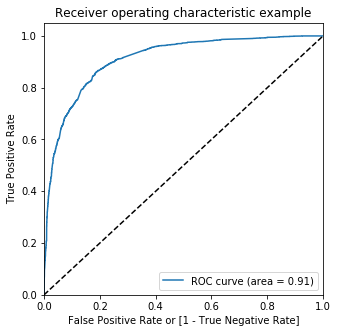

In [358]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

### ROC AUC(Area under the Curve) = 0.91

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [359]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead Number,Converted,Convert_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,630949,0,0.07,0,1,0,0,0,0,0,0,0,0,0
1,649355,0,0.01,0,1,0,0,0,0,0,0,0,0,0
2,579735,0,0.46,0,1,1,1,1,1,0,0,0,0,0
3,614238,1,0.67,1,1,1,1,1,1,1,1,0,0,0
4,588625,1,0.75,1,1,1,1,1,1,1,1,1,0,0


In [360]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.39   1.00   0.00
0.10  0.10      0.71   0.97   0.55
0.20  0.20      0.80   0.91   0.73
0.30  0.30      0.83   0.87   0.80
0.40  0.40      0.83   0.82   0.85
0.50  0.50      0.83   0.74   0.89
0.60  0.60      0.83   0.69   0.92
0.70  0.70      0.81   0.59   0.95
0.80  0.80      0.79   0.51   0.97
0.90  0.90      0.74   0.36   0.99


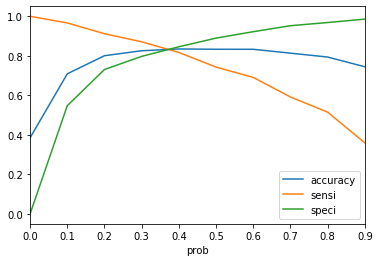

In [361]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**`From the curve above, 0.34 is the optimum point to take it as a cutoff probability`**

In [362]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Lead Number,Converted,Convert_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,630949,0,0.07,0,1,0,0,0,0,0,0,0,0,0,0
1,649355,0,0.01,0,1,0,0,0,0,0,0,0,0,0,0
2,579735,0,0.46,0,1,1,1,1,1,0,0,0,0,0,1
3,614238,1,0.67,1,1,1,1,1,1,1,1,0,0,0,1
4,588625,1,0.75,1,1,1,1,1,1,1,1,1,0,0,1


In [363]:
# Let's check the overall accuracy.
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(accuracy)

0.8310502283105022


In [364]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3194,  711],
       [ 362, 2084]], dtype=int64)

In [365]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [366]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
print(sensitivity)

0.8520032706459526


In [367]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
print(specificity)

0.8179257362355954


In [368]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1820742637644046


In [369]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7456171735241502


In [370]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8982002249718786


## Precision and Recall

In [371]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3473,  432],
       [ 629, 1817]], dtype=int64)

##### Precision
TP / TP + FP

In [372]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8079146287238773

##### Recall
TP / TP + FN

In [373]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7428454619787408

### From Sklearn

In [374]:
from sklearn.metrics import precision_score, recall_score

In [375]:
precision = precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(precision)

0.8079146287238773


In [376]:
recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(recall)

0.7428454619787408


### Precision and recall tradeoff

In [377]:
from sklearn.metrics import precision_recall_curve

In [378]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
        ..
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0
 6341    0
 6342    1
 6343    0
 6344    1
 6345    1
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       1
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      0
 21      0
 22      0
 23      0
 24      1
 25      

In [379]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

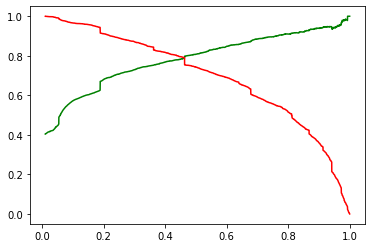

In [380]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### F1 Score

In [381]:
F1_score = 2 * (precision * recall) / (precision + recall)
print("F1_Score :" , F1_score)

F1_Score : 0.7740149094781682


**`F1_Score : 0.7740149094781682`**

### Making predictions on the test set

In [382]:
X_test[['TotalVisits','Website Time','Page Views']] = scaler.transform(X_test[['TotalVisits','Website Time','Page Views']])

In [383]:
list(col)

['Website Time',
 'Lead Source_Direct Traffic',
 'Lead Source_Google',
 'Lead Source_Olark Chat',
 'Lead Source_Organic Search',
 'Last Activity_Email Bounced',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_SMS Sent',
 'Lead Quality_High in Relevance',
 'Lead Quality_Low in Relevance',
 'Lead Quality_Might be',
 'Lead Quality_Worst']

In [384]:
X_test = X_test[['Lead Number'] + list(col)]
X_test.head()

,Lead Number,Website Time,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Worst
3271,628652,-0.60,0,1,0,0,0,0,0,0,0,0,0
1490,644500,1.90,1,0,0,0,0,0,0,0,1,0,0
7936,588935,-0.75,0,1,0,0,0,0,0,0,0,0,0
4216,619437,-0.89,0,0,0,0,0,0,0,0,1,0,0
3830,623381,-0.59,0,0,0,1,0,0,0,0,0,0,0


In [385]:
X_test_sm = sm.add_constant(X_test.iloc[:, 1:])

In [386]:
y_test_pred = res.predict(X_test_sm)

In [387]:
y_test_pred[:10]

3271   0.07
1490   0.93
7936   0.06
4216   0.91
3830   0.05
1800   0.54
6507   0.21
4821   0.12
4223   0.99
4714   0.46
dtype: float64

In [388]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [389]:
# Let's see the head
y_pred_1.head()

,0
3271,0.07
1490,0.93
7936,0.06
4216,0.91
3830,0.05


In [390]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [391]:
y_test_df.head()

,Lead Number,Converted
3271,628652,0
1490,644500,1
7936,588935,0
4216,619437,1
3830,623381,0


In [392]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [393]:
y_pred_final.head()

,Lead Number,Converted,0
3271,628652,0,0.07
1490,644500,1,0.93
7936,588935,0,0.06
4216,619437,1,0.91
3830,623381,0,0.05


In [394]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [395]:
y_pred_final.head()

,Lead Number,Converted,Convert_Prob
3271,628652,0,0.07
1490,644500,1,0.93
7936,588935,0,0.06
4216,619437,1,0.91
3830,623381,0,0.05


In [396]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.34 else 0)

In [397]:
y_pred_final.head()

,Lead Number,Converted,Convert_Prob,final_predicted
3271,628652,0,0.07,0
1490,644500,1,0.93,1
7936,588935,0,0.06,0
4216,619437,1,0.91,1
3830,623381,0,0.05,0


In [398]:
# Let's check the overall accuracy.
test_accuracy = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
print(test_accuracy)

0.8204186558942343


In [399]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1419,  315],
       [ 174,  815]], dtype=int64)

In [400]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [401]:
# Let's see the sensitivity of our logistic regression model
test_sensitivity = TP / float(TP+FN)
print(test_sensitivity)

0.8240647118301314


In [402]:
# Let us calculate specificity
test_specificity = TN / float(TN+FP)
print(test_specificity)

0.8183391003460208


In [403]:
y_train_pred_final.head()

,Lead Number,Converted,Convert_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,630949,0,0.07,0,1,0,0,0,0,0,0,0,0,0,0
1,649355,0,0.01,0,1,0,0,0,0,0,0,0,0,0,0
2,579735,0,0.46,0,1,1,1,1,1,0,0,0,0,0,1
3,614238,1,0.67,1,1,1,1,1,1,1,1,0,0,0,1
4,588625,1,0.75,1,1,1,1,1,1,1,1,1,0,0,1


In [404]:
y_train_LEAD = y_train_pred_final[['Lead Number','Converted','Convert_Prob','final_predicted']].copy()
y_train_LEAD.head()

,Lead Number,Converted,Convert_Prob,final_predicted
0,630949,0,0.07,0
1,649355,0,0.01,0
2,579735,0,0.46,1
3,614238,1,0.67,1
4,588625,1,0.75,1


In [405]:
y_pred_final.head()

,Lead Number,Converted,Convert_Prob,final_predicted
3271,628652,0,0.07,0
1490,644500,1,0.93,1
7936,588935,0,0.06,0
4216,619437,1,0.91,1
3830,623381,0,0.05,0


In [406]:
y_LEAD = y_train_LEAD.append( y_pred_final)
y_LEAD.shape

(9074, 4)

In [407]:
y_LEAD['Convert_Prob'] = y_LEAD['Convert_Prob']
y_LEAD.head()

,Lead Number,Converted,Convert_Prob,final_predicted
0,630949,0,0.07,0
1,649355,0,0.01,0
2,579735,0,0.46,1
3,614238,1,0.67,1
4,588625,1,0.75,1


In [408]:
myleads.head()

,Lead Number,Converted,TotalVisits,Website Time,Page Views,Free Copy,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,...,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,660737,0,0.00,0.00,0.00,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,660728,0,5.00,674.00,2.50,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.00,1532.00,2.00,1,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
3,660719,0,1.00,305.00,1.00,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
4,660681,1,2.00,1428.00,1.00,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0


In [409]:
mydata1 = myleads[['Lead Number', 'Website Time', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Lead Quality_High in Relevance', 'Lead Quality_Low in Relevance',
       'Lead Quality_Might be', 'Lead Quality_Worst']].copy()

In [410]:
mydata2 = y_LEAD.copy()

In [411]:
#Merging two dataframes on "Lead Number"
final_LEAD = pd.merge(mydata1, mydata2, on = 'Lead Number')
final_LEAD.head()

,Lead Number,Website Time,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Worst,Converted,Convert_Prob,final_predicted
0,660737,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0.81,1
1,660728,674.00,0,0,0,1,0,0,0,0,0,0,0,0,0.14,0
2,660727,1532.00,1,0,0,0,0,0,0,0,0,1,0,1,0.85,1
3,660719,305.00,1,0,0,0,0,0,0,0,0,0,0,0,0.06,0
4,660681,1428.00,0,1,0,0,0,0,0,0,0,1,0,1,0.87,1


In [412]:
#Checking Null
final_LEAD.isnull().sum()

Lead Number                              0
Website Time                             0
Lead Source_Direct Traffic               0
Lead Source_Google                       0
Lead Source_Olark Chat                   0
Lead Source_Organic Search               0
Last Activity_Email Bounced              0
Last Activity_Olark Chat Conversation    0
Last Activity_SMS Sent                   0
Lead Quality_High in Relevance           0
Lead Quality_Low in Relevance            0
Lead Quality_Might be                    0
Lead Quality_Worst                       0
Converted                                0
Convert_Prob                             0
final_predicted                          0
dtype: int64

### Final Data Frame with Lead Score

In [413]:
# Creating Lead Score
final_LEAD['Lead Score'] = final_LEAD['Convert_Prob'].apply(lambda x : round(x*100, 2))
final_LEAD.head()

,Lead Number,Website Time,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Worst,Converted,Convert_Prob,final_predicted,Lead Score
0,660737,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0.81,1,81.10
1,660728,674.00,0,0,0,1,0,0,0,0,0,0,0,0,0.14,0,13.64
2,660727,1532.00,1,0,0,0,0,0,0,0,0,1,0,1,0.85,1,85.05
3,660719,305.00,1,0,0,0,0,0,0,0,0,0,0,0,0.06,0,6.26
4,660681,1428.00,0,1,0,0,0,0,0,0,0,1,0,1,0.87,1,87.48


### Sorting by Lead Score

In [414]:
final_LEAD.sort_values(by = 'Lead Score', ascending = False).head(10)

,Lead Number,Website Time,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Worst,Converted,Convert_Prob,final_predicted,Lead Score
2426,635776,1723.00,0,0,0,0,0,0,1,1,0,0,0,1,1.00,1,99.97
6118,601868,1397.00,0,0,0,0,0,0,1,1,0,0,0,1,1.00,1,99.95
2523,634647,1194.00,0,0,0,0,0,0,1,1,0,0,0,1,1.00,1,99.93
6512,598818,1790.00,0,0,0,0,0,0,0,1,0,0,0,1,1.00,1,99.92
4028,620454,1812.00,0,0,0,0,0,0,0,1,0,0,0,1,1.00,1,99.92
5183,609185,1770.00,0,0,0,0,0,0,0,1,0,0,0,1,1.00,1,99.91
703,652787,1764.00,0,0,0,0,0,0,0,1,0,0,0,1,1.00,1,99.91
4728,613659,1678.00,0,0,0,0,0,0,0,1,0,0,0,1,1.00,1,99.89
1051,648361,1653.00,0,0,0,0,0,0,0,1,0,0,0,1,1.00,1,99.89
5906,603581,1548.00,0,0,0,0,0,0,0,1,0,0,0,1,1.00,1,99.86


### Calculating odds

In [415]:
final_LEAD['Odds'] = (final_LEAD['Convert_Prob'])/((1 - (final_LEAD['Convert_Prob'])))
final_LEAD.head()                                                   

,Lead Number,Website Time,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Worst,Converted,Convert_Prob,final_predicted,Lead Score,Odds
0,660737,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0.81,1,81.10,4.29
1,660728,674.00,0,0,0,1,0,0,0,0,0,0,0,0,0.14,0,13.64,0.16
2,660727,1532.00,1,0,0,0,0,0,0,0,0,1,0,1,0.85,1,85.05,5.69
3,660719,305.00,1,0,0,0,0,0,0,0,0,0,0,0,0.06,0,6.26,0.07
4,660681,1428.00,0,1,0,0,0,0,0,0,0,1,0,1,0.87,1,87.48,6.99


### Calculating y ie log odds

### **`log(p/(1-p)) = y`**

In [416]:
final_LEAD['Log_Odds_y'] = np.log((final_LEAD['Convert_Prob'])/((1 - (final_LEAD['Convert_Prob']))))
final_LEAD.head()

,Lead Number,Website Time,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Worst,Converted,Convert_Prob,final_predicted,Lead Score,Odds,Log_Odds_y
0,660737,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0.81,1,81.10,4.29,1.46
1,660728,674.00,0,0,0,1,0,0,0,0,0,0,0,0,0.14,0,13.64,0.16,-1.85
2,660727,1532.00,1,0,0,0,0,0,0,0,0,1,0,1,0.85,1,85.05,5.69,1.74
3,660719,305.00,1,0,0,0,0,0,0,0,0,0,0,0,0.06,0,6.26,0.07,-2.71
4,660681,1428.00,0,1,0,0,0,0,0,0,0,1,0,1,0.87,1,87.48,6.99,1.94


In [417]:
final_LEAD.sort_values(by = 'Log_Odds_y', ascending = False).head(5)

,Lead Number,Website Time,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Worst,Converted,Convert_Prob,final_predicted,Lead Score,Odds,Log_Odds_y
2426,635776,1723.00,0,0,0,0,0,0,1,1,0,0,0,1,1.00,1,99.97,3844.82,8.25
6118,601868,1397.00,0,0,0,0,0,0,1,1,0,0,0,1,1.00,1,99.95,2023.33,7.61
2523,634647,1194.00,0,0,0,0,0,0,1,1,0,0,0,1,1.00,1,99.93,1356.60,7.21
4028,620454,1812.00,0,0,0,0,0,0,0,1,0,0,0,1,1.00,1,99.92,1236.89,7.12
6512,598818,1790.00,0,0,0,0,0,0,0,1,0,0,0,1,1.00,1,99.92,1184.45,7.08


In [418]:
#Min and Max of Log Odds
final_LEAD['Log_Odds_y'].max(), final_LEAD['Log_Odds_y'].min()

(8.254481785383426, -7.094917756795302)

In [419]:
# coefficients of our final model 

pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Website Time                             1.07
Lead Source_Direct Traffic              -2.74
Lead Source_Google                      -2.33
Lead Source_Olark Chat                  -0.89
Lead Source_Organic Search              -2.61
Last Activity_Email Bounced             -1.65
Last Activity_Olark Chat Conversation   -1.39
Last Activity_SMS Sent                   1.31
Lead Quality_High in Relevance           4.12
Lead Quality_Low in Relevance            2.91
Lead Quality_Might be                    2.03
Lead Quality_Worst                      -2.18
dtype: float64

### Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

### The top 5 variables are:
- Lead Quality_High in Relevance
- Lead Quality_Low in Relevance
- Lead Quality_Might be
- Last Activity_SMS Sent
- Website Time

## Final Logistic Regression 

**`log(p/(1-p)) = y`**

**`p = e^y/ 1 + e^y`**

**This is the equation used in Logistic Regression. Here (p/1-p) is the odd ratio. Whenever the log of odd ratio is found to be positive, the probability of success is always more than 50%**

**y = 0.3876 +1.0678*(Website Time) -2.7429*(Lead Source_Direct Traffic)-2.3323*(Lead Source_Google) -0.8926* (Lead Source_Olark Chat)-2.6087*(Lead Source_Organic Search) -1.6455*(Last Activity_Email Bounced)  -1.3932*(Last Activity_Olark Chat Conversation) + 1.3094*(Last Activity_SMS Sent)+4.1162*(Lead Quality_High in Relevance) +2.9133*(Lead Quality_Low in Relevance)+2.0285*(Lead Quallity_Might be) - 2.1758*(Lead Quality_Worst)**  

### Conclusions:
- People with Lead Score Above 34 are Hot Leads
- Company should focus on high quality leads and medium quality leads to make the calls
- If we want to significantly increase the probability of lead conversion we should focus on 
> -	customers that are spend more time on the website, 
> -	send SMS in return, 
> -	Focus more on the customers that are being marked as High relevance and Low relevance as they are more likely to convert and purchase the course. 


# Model  Summary

- Train Accuracy =  0.8310
- Train Sensitivity = 0.8520
- Train Specificity = 0.8179

> - Test Accuracy = 0.8204
> - Test Sensitivity = 0.8241
> - Test Specificity = 0.8183

>>- Number of Variables = 12

>> - ROC AUC = 0.91
>> - Precision = 0.879
>> - Recall = 0.7428
>> - F1 Score = 0.7740

In [420]:
# Thank you